<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Contents: NLP Project - 1
1. [Part-A: Solution](#Part-A:-Solution)
2. [Part-B: Solution](#Part-B:-Solution)

# Part-A: Solution

- **DOMAIN:** Digital content management
- **CONTEXT:** Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.
- **Data Description:** Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
 - 8240 "10s" blogs (ages 13-17),
 - 8086 "20s" blogs (ages 23-27) and
 - 2994 "30s" blogs (ages 33-47)
 - For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link.
- **PROJECT OBJECTIVE:** To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

In [1]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import zscore

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, plot_roc_curve 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

# from sklearn.decomposition import PCA
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.cluster.hierarchy import fcluster
# from sklearn.cluster import KMeans 
# from sklearn.metrics import silhouette_samples, silhouette_score

# import xgboost as xgb
# from xgboost import plot_importance
# from lightgbm import LGBMClassifier

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import pandas_profiling as pp

import gensim
import logging

# import cv2
# from google.colab.patches import cv2_imshow
# from glob import glob
# import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings("ignore")

import random
from zipfile import ZipFile

# Set random_state
random_state = 42

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Read and Analyse Dataset.

In [3]:
# Current working directory
%cd "/content/drive/MyDrive/MGL/Project-NLP-1/"

# # List all the files in a directory
# for dirname, _, filenames in os.walk('path'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

/content/drive/MyDrive/MGL/Project-NLP-1


In [4]:
# List files in the directory
!ls

 blogs.zip				'Milestone-NLP 1.pdf'
 blogtext.csv				'NLP-1_Problem Statement.pdf'
'Copy of P-1.ipynb'			'NLP FAQ Stat.pdf'
'GL Bot.json'				 P-1.ipynb
 glove.840B.300d.txt			 P-2.ipynb
 GoogleNews-vectors-negative300.bin.gz	'REVALUATION POLICY-6.pdf'


In [5]:
# # Path of the data file
# path = 'blogs.zip'

# # Unzip files in the current directory

# with ZipFile (path,'r') as z:
#   z.extractall() 
# print("Training zip extraction done!")

### 1A. Clearly write outcome of data analysis (Minimum 2 points)

In [6]:
# Import the dataset
dfa = pd.read_csv("blogtext.csv")

In [7]:
dfa.shape

(681284, 7)

In [8]:
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [9]:
dfa.tail()

,id,gender,age,topic,sign,date,text
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."
681283,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a..."


In [10]:
# As the dataset is large; use a subset of the data. Let's Check what is working on the local machine.
# Can use 10,000/100,000 later
# dfa = pd.read_csv("blogtext.csv", nrows=1000) 
dfa = dfa.sample(n=60000, random_state = 0)

In [11]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 646683 to 208075
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   gender  60000 non-null  object
 2   age     60000 non-null  int64 
 3   topic   60000 non-null  object
 4   sign    60000 non-null  object
 5   date    60000 non-null  object
 6   text    60000 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.7+ MB


In [12]:
dfa.topic.value_counts()

indUnk                     22065
Student                    13535
Technology                  3761
Arts                        2807
Education                   2677
Communications-Media        1746
Internet                    1398
Non-Profit                  1286
Engineering                 1019
Law                          820
Publishing                   685
Science                      644
Government                   607
Consulting                   523
Religion                     467
Fashion                      444
Marketing                    409
Advertising                  399
BusinessServices             397
Banking                      360
Chemicals                    357
Telecommunications           350
Accounting                   315
Sports-Recreation            276
Museums-Libraries            275
Military                     260
HumanResources               252
RealEstate                   245
Manufacturing                201
Transportation               200
Biotech   

In [13]:
# Count of unique values
print('Unique values in the column gender are',dfa['gender'].nunique())
print('Unique values in the column age are',dfa['age'].nunique())
print('Unique values in the column topic are',dfa['topic'].nunique())
print('Unique values in the column sign are',dfa['sign'].nunique())

Unique values in the column gender are 2
Unique values in the column age are 26
Unique values in the column topic are 40
Unique values in the column sign are 12


In [14]:
# Describe function generates descriptive statistics that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.

# This method tells us a lot of things about a dataset. One important thing is that 
# the describe() method deals only with numeric values. It doesn't work with any 
# categorical values. So if there are any categorical values in a column the describe() 
# method will ignore it and display summary for the other columns.

dfa.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,60000.0,NaN,NaN,NaN,2399629.56955,1250314.428347,5114.0,1239610.0,2608016.0,3532712.0,4336547.0
gender,60000,2,male,30324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,60000.0,NaN,NaN,NaN,23.961933,7.816218,13.0,17.0,24.0,27.0,48.0
topic,60000,40,indUnk,22065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sign,60000,12,Cancer,5830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,60000,1579,"02,August,2004",1442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,60000,58741,urlLink,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Clear the matplotlib plotting backend
%matplotlib inline
plt.close('all')

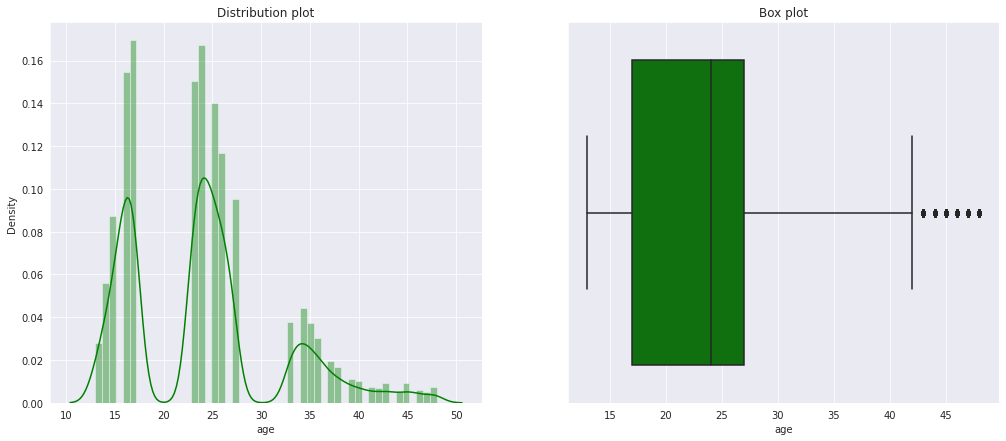

 Total Number of outliers in age: 1733


In [16]:
# Understand the 'age'
# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(dfa['age'],  ax=axes[0],color='Green')
sns.boxplot(x = 'age', data=dfa,  orient='h' , ax=axes[1],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfa['age'],25),np.percentile(dfa['age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfa['age'] if i < lower or i > upper]
print('{} Total Number of outliers in age: {}'.format('\033[1m',len(Outliers)))

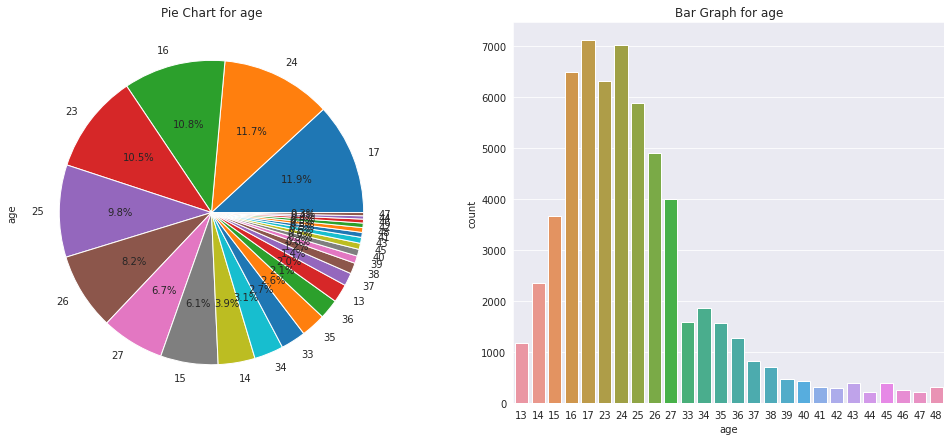

In [17]:
# Understand the 'age'
f,axes=plt.subplots(1,2,figsize=(17,7))
dfa['age'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('age',data=dfa,ax=axes[1])
axes[0].set_title('Pie Chart for age')
axes[1].set_title('Bar Graph for age')
plt.show()

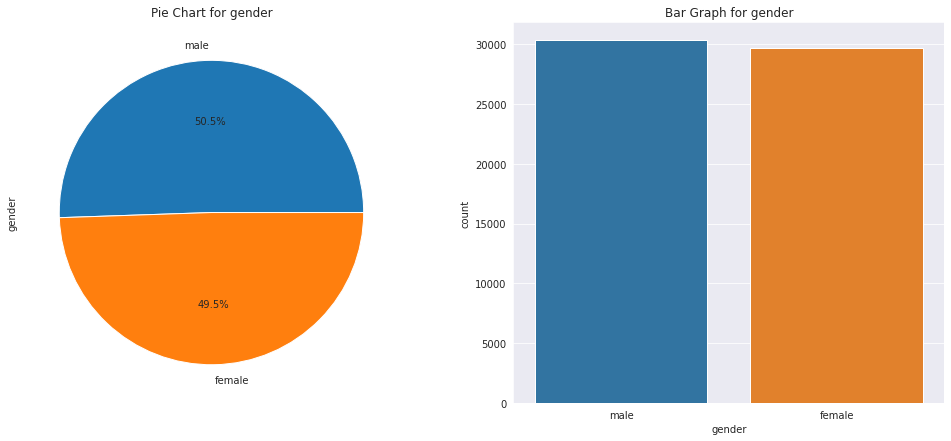

In [18]:
# Understand the 'gender'
f,axes=plt.subplots(1,2,figsize=(17,7))
dfa['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('gender',data=dfa,ax=axes[1])
axes[0].set_title('Pie Chart for gender')
axes[1].set_title('Bar Graph for gender')
plt.show()

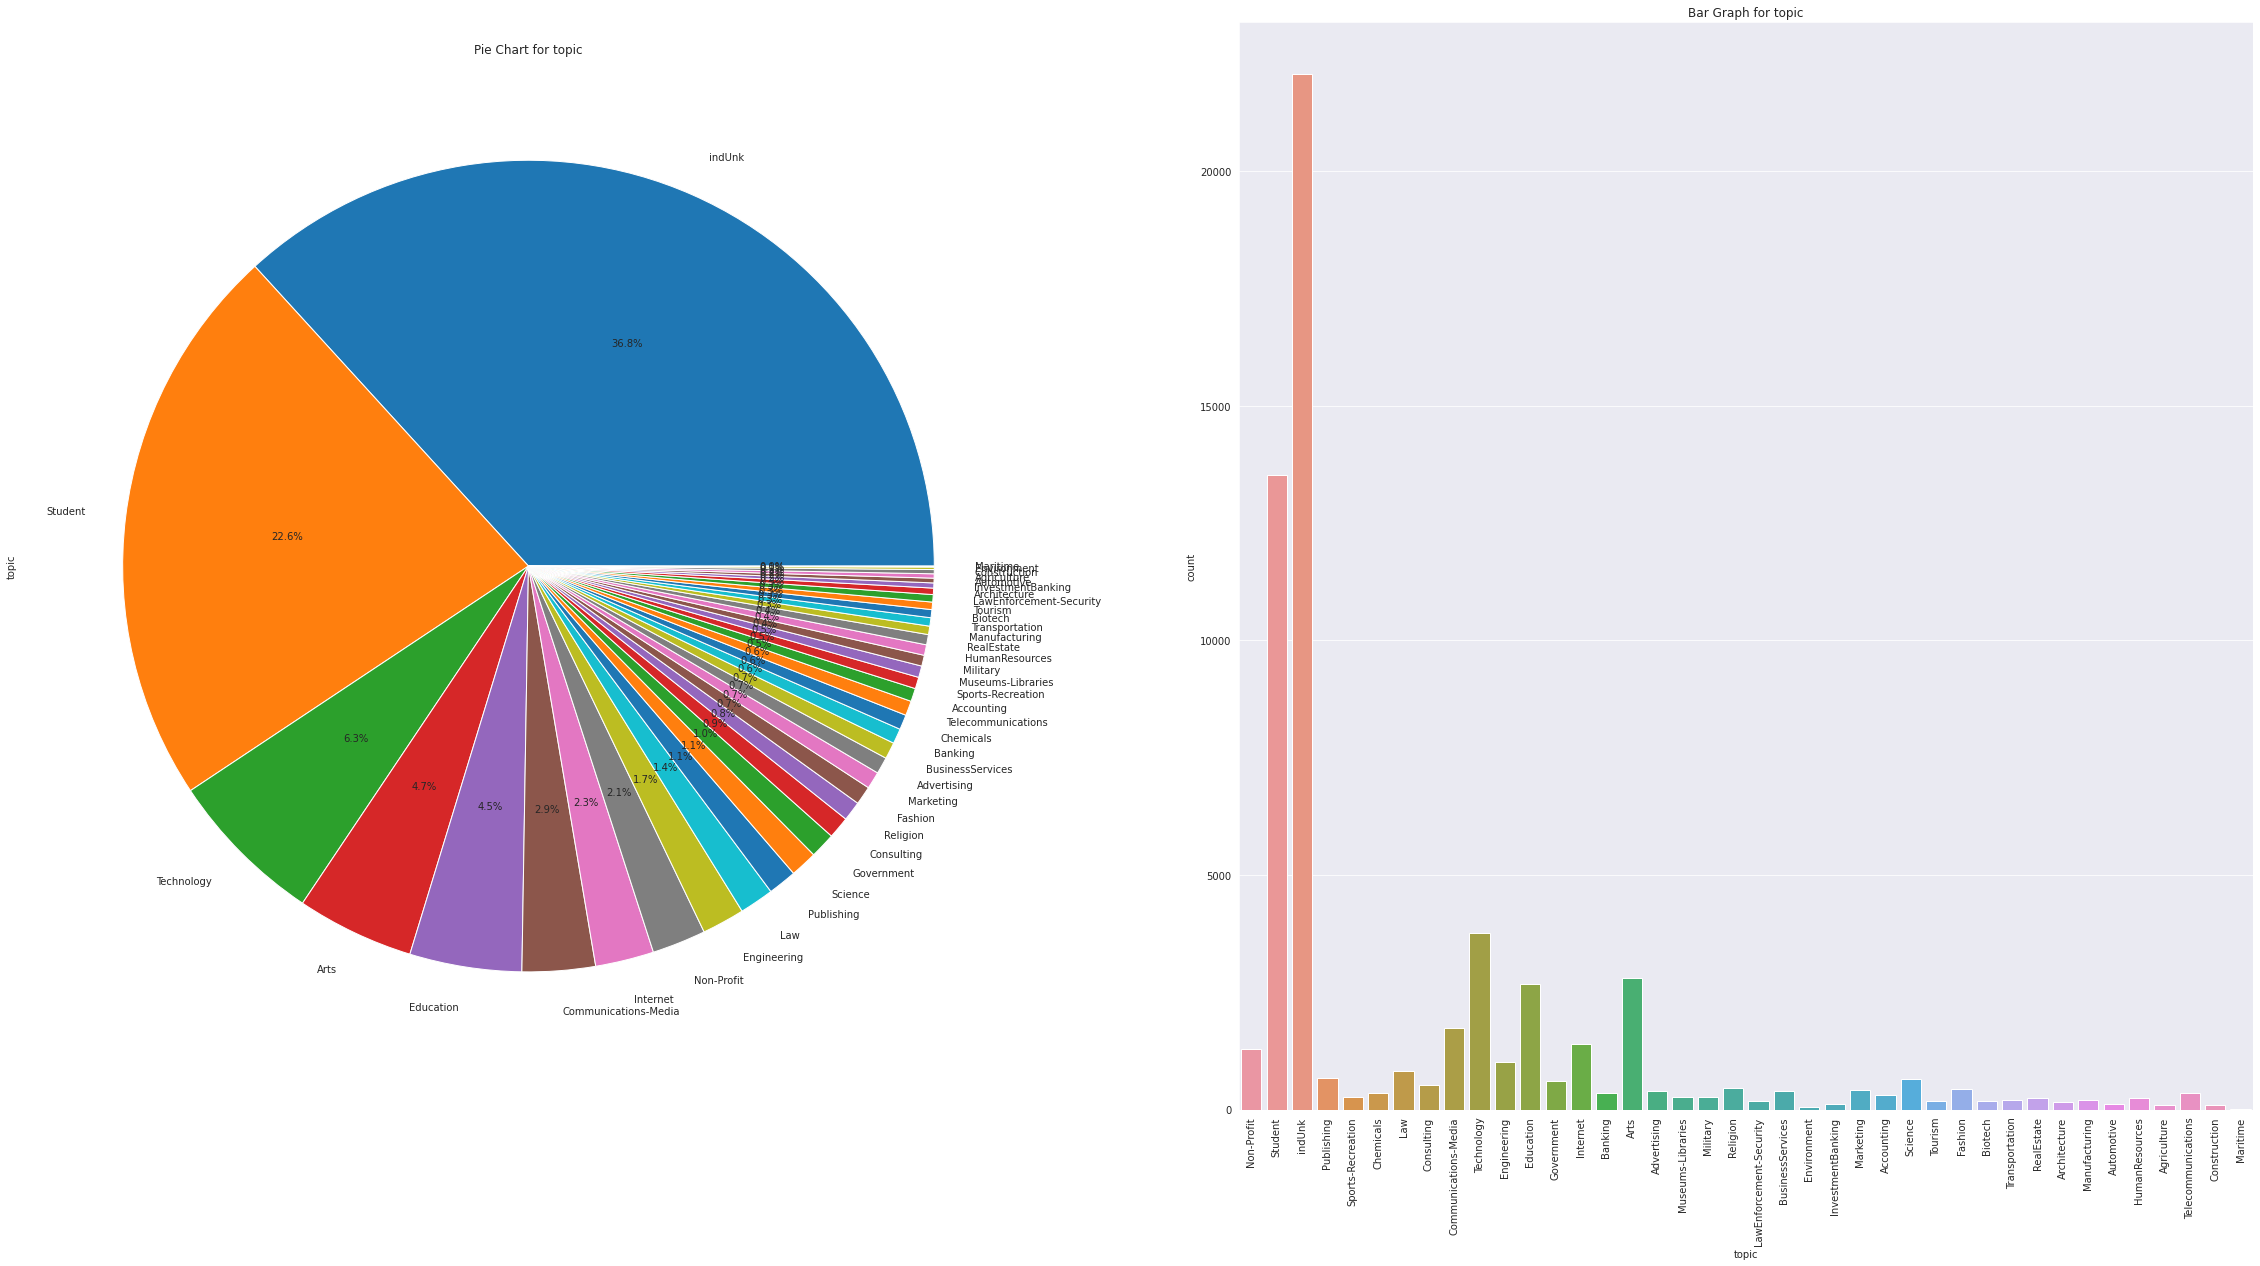

In [19]:
# Understand the 'topic'
f,axes=plt.subplots(1,2,figsize=(40,20))
dfa['topic'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('topic',data=dfa,ax=axes[1])
axes[0].set_title('Pie Chart for topic')
axes[1].set_title('Bar Graph for topic')
plt.xticks(rotation=90)
plt.show()

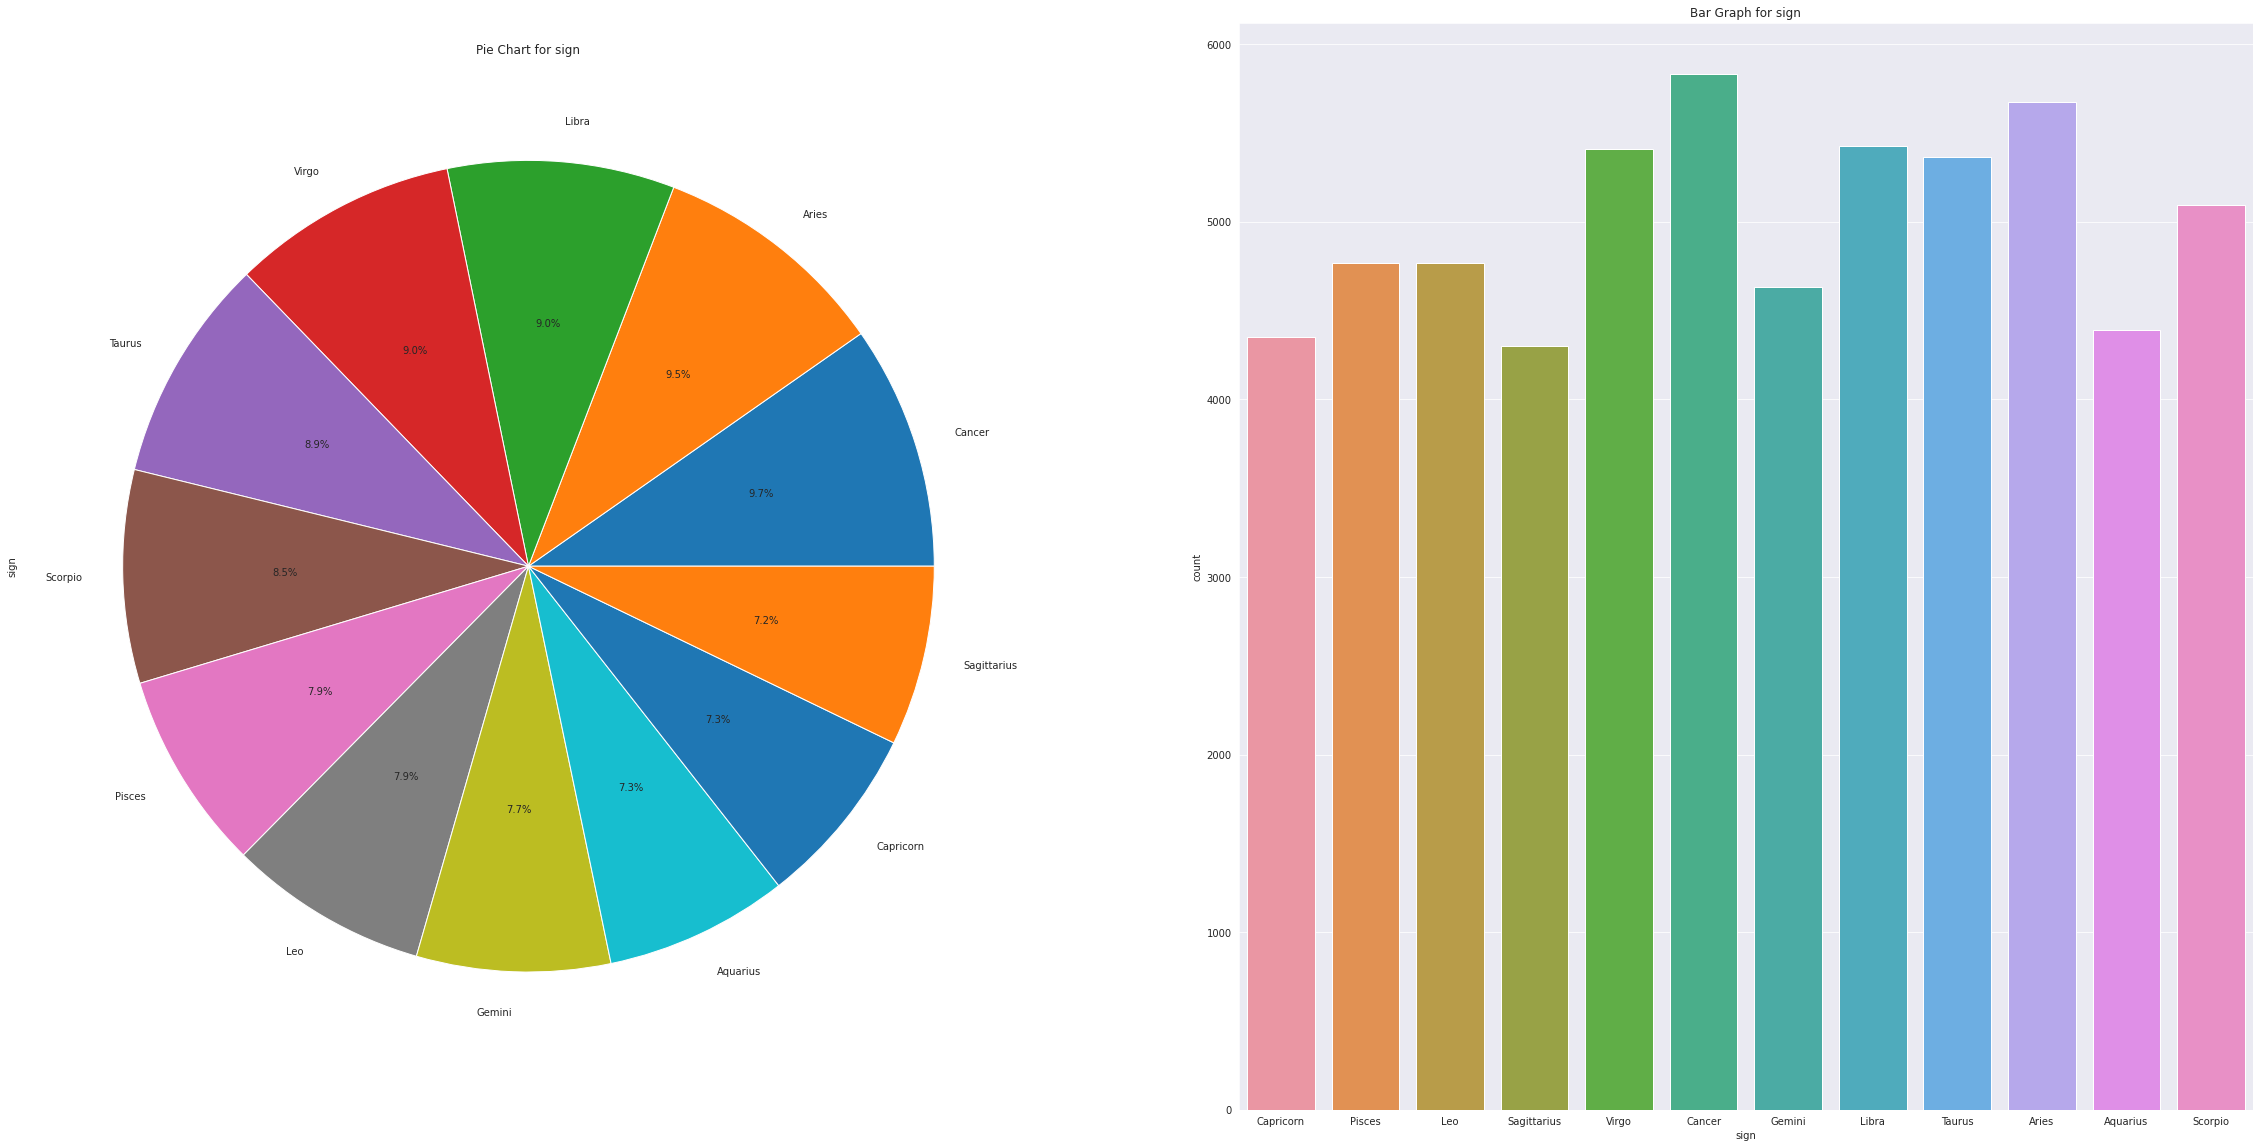

In [20]:
# Understand the 'sign'
f,axes=plt.subplots(1,2,figsize=(40,20))
dfa['sign'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('sign',data=dfa,ax=axes[1])
axes[0].set_title('Pie Chart for sign')
axes[1].set_title('Bar Graph for sign')
plt.show()

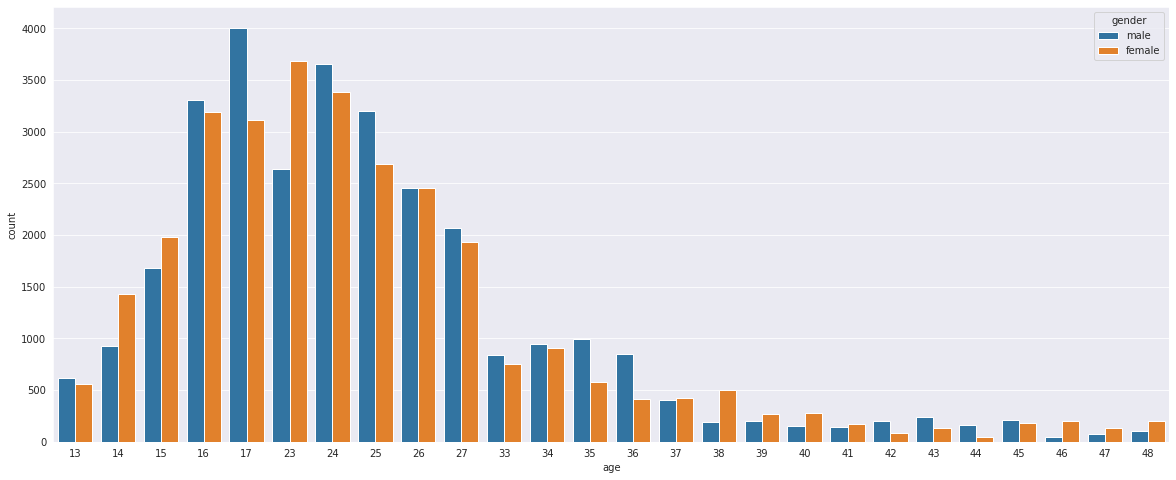

In [21]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="age", hue="gender", data=dfa)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

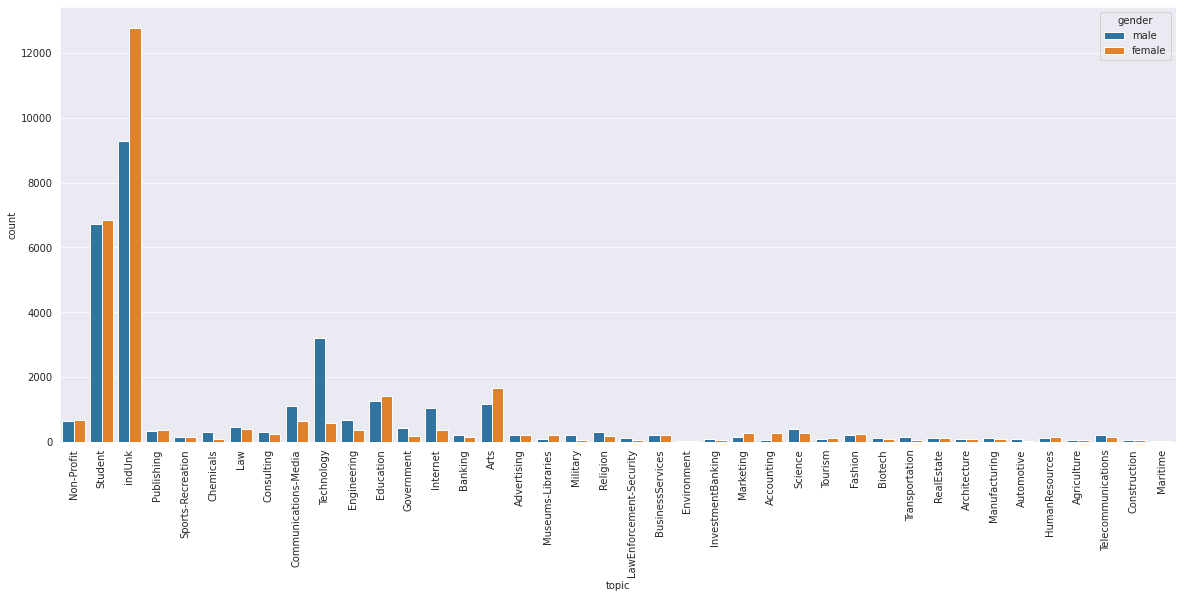

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="topic", hue="gender", data=dfa)
plt.xticks(rotation=90)

Check some blogs

In [23]:
dfa['text'].iloc[1]

'            urlLink    8/13/2004 - keep it down! by eric         '

In [24]:
dfa['text'].iloc[5]

"            urlLink    gosh, she's damn hottt huh. but hah, im straight.. but ahhh she's really gorgeous.. extremely gorgeous..no wonder OC's ratings are up..ahaha..anw cuz there's also hunks lyk benjamin, adam, chris....heh..&nbsp; urlLink            "

In [25]:
dfa['text'].iloc[10]

'           Anyone (not just BlogTeam members) can leave comments in response to any of the main posts directly from this page.  Just click on the Comments link below the relevant post, fill in your name and leave a message.  Primitive, but simple.  Enjoy!         '

**There is imbalance in the target vector:**

If the imbalanced data is not treated beforehand, then this will degrade the performance of the ML model. Most of the predictions will correspond to the majority class and treat the minority class of features as noise in the data and ignore them. This results in a high bias and low performance of the model.

A widely adopted technique for dealing with highly unbalanced datasets is called re-sampling.

**Two widely used re-sampling methods are:**

- Under-sampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.
- Over-sampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class
- Here we can use oversampling because under-sampling may remove important information from the dataset

### 1B. Clean the Structured Data
- Missing value analysis and imputation.
- Eliminate Non-English textual data.
- Hint: Refer ‘langdetect’ library to detect language of the input text

In [26]:
# Percentage of missing values

# df.isnull().sum()
# df.isna().sum()

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dfa)

,Total,Percent
id,0,0.0
gender,0,0.0
age,0,0.0
topic,0,0.0
sign,0,0.0
date,0,0.0
text,0,0.0


In [27]:
# Chceck for na values
dfa.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [28]:
# To take a look at the duplication in the DataFrame as a whole, just call the duplicated() method on 
# the DataFrame. It outputs True if an entire row is identical to a previous row.
dfa.duplicated().sum()

101

In [29]:
# Count the number of non-duplicates
(~dfa.duplicated()).sum()

59899

In [30]:
# Extract duplicate rows
dfa.loc[dfa.duplicated(), :]

,id,gender,age,topic,sign,date,text
168235,4209136,male,26,indUnk,Aquarius,"12,August,2004",urlLink
271518,788358,male,24,Arts,Libra,"02,July,2004",urlLink &nbsp; urlLink
55591,3334411,female,38,indUnk,Gemini,"03,August,2004",urlLink
55232,3334411,female,38,indUnk,Gemini,"07,June,2004",urlLink Sylvain's 40th Birthday ...
271542,788358,male,24,Arts,Libra,"02,July,2004",urlLink &nbsp; urlLink
...,...,...,...,...,...,...,...
203983,3473709,male,25,Non-Profit,Pisces,"03,June,2004",
105150,3522219,female,13,indUnk,Taurus,"02,June,2004",Cherry I Love U urlLink
96664,3743863,male,35,Transportation,Pisces,"15,July,2004",Brought to you by JPServicez.co...
105523,2866266,male,13,indUnk,Taurus,"13,March,2004",Went camping. Went snorkelling. G...


In [31]:
# Dropping the duplicate rows
dfa = dfa.drop_duplicates()
dfa

,id,gender,age,topic,sign,date,text
646683,3959129,male,23,Non-Profit,Capricorn,"26,July,2004","First, we must really know what ex..."
110202,4187774,male,17,Student,Pisces,"13,August,2004",urlLink 8/13/2004 - keep it dow...
352376,1155573,male,23,indUnk,Leo,"14,February,2004","Field camp was long, but okay..."
399737,3040326,female,26,Publishing,Sagittarius,"16,March,2004",Attention Mondeo-driving salesmen! It...
456147,1978620,female,24,indUnk,Virgo,"14,mayo,2004",So my bahelorette party is scheduled fo...
...,...,...,...,...,...,...,...
400101,296044,male,27,Technology,Capricorn,"12,September,2001",It's Alright Dictation being forced in...
645021,3867508,male,25,Technology,Aquarius,"09,August,2004",urlLink AlterNet: Tough Sledding...
195085,1951423,female,24,Arts,Scorpio,"24,August,2003","actually, that was a bit harsh not so ..."
90937,3884852,female,24,Government,Capricorn,"13,July,2004",http://hokev.brinkster.net/quiz/default...


In [32]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4cd6ecd78e0a3e24e741d3886dbd03da377283729e2aab91207b6833fc493a76
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [33]:
import langdetect
from langdetect import detect

In [34]:
# Create function to detect other languages in the dataframe
df = pd.DataFrame({'text': ['This is written in English.', 'هذا مكتوب باللغة العربية', 'English is easy to learn', '']})

def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

df['lang'] = df['text'].apply(det)
df

,text,lang
0,This is written in English.,en
1,هذا مكتوب باللغة العربية,ar
2,English is easy to learn,en
3,,Other


In [35]:
dfa['lang'] = dfa['text'].apply(det)
dfa

,id,gender,age,topic,sign,date,text,lang
646683,3959129,male,23,Non-Profit,Capricorn,"26,July,2004","First, we must really know what ex...",en
110202,4187774,male,17,Student,Pisces,"13,August,2004",urlLink 8/13/2004 - keep it dow...,en
352376,1155573,male,23,indUnk,Leo,"14,February,2004","Field camp was long, but okay...",en
399737,3040326,female,26,Publishing,Sagittarius,"16,March,2004",Attention Mondeo-driving salesmen! It...,en
456147,1978620,female,24,indUnk,Virgo,"14,mayo,2004",So my bahelorette party is scheduled fo...,en
...,...,...,...,...,...,...,...,...
400101,296044,male,27,Technology,Capricorn,"12,September,2001",It's Alright Dictation being forced in...,en
645021,3867508,male,25,Technology,Aquarius,"09,August,2004",urlLink AlterNet: Tough Sledding...,en
195085,1951423,female,24,Arts,Scorpio,"24,August,2003","actually, that was a bit harsh not so ...",en
90937,3884852,female,24,Government,Capricorn,"13,July,2004",http://hokev.brinkster.net/quiz/default...,en


In [36]:
dfa[dfa["lang"]=='Other']

,id,gender,age,topic,sign,date,text,lang
292292,2691588,male,24,indUnk,Gemini,"25,January,2004",,Other
526624,76211,female,27,Internet,Gemini,"25,July,2002",...,Other
349584,3152540,female,16,Arts,Virgo,"12,June,2004",,Other
220037,2996288,female,26,Student,Gemini,"01,July,2004",,Other
494987,1283465,female,24,indUnk,Leo,"04,June,2004",,Other
...,...,...,...,...,...,...,...,...
137818,2308025,male,23,Law,Libra,"30,April,2004",,Other
668793,2028466,female,15,Student,Virgo,"03,December,2003",486-6380 486-6380 486-6380 486-...,Other
243267,3606815,male,25,Government,Leo,"07,July,2004",,Other
595484,2464907,male,36,Technology,Virgo,"03,August,2004",,Other


In [37]:
dfa = dfa[dfa["lang"]=='en']
dfa

,id,gender,age,topic,sign,date,text,lang
646683,3959129,male,23,Non-Profit,Capricorn,"26,July,2004","First, we must really know what ex...",en
110202,4187774,male,17,Student,Pisces,"13,August,2004",urlLink 8/13/2004 - keep it dow...,en
352376,1155573,male,23,indUnk,Leo,"14,February,2004","Field camp was long, but okay...",en
399737,3040326,female,26,Publishing,Sagittarius,"16,March,2004",Attention Mondeo-driving salesmen! It...,en
456147,1978620,female,24,indUnk,Virgo,"14,mayo,2004",So my bahelorette party is scheduled fo...,en
...,...,...,...,...,...,...,...,...
400101,296044,male,27,Technology,Capricorn,"12,September,2001",It's Alright Dictation being forced in...,en
645021,3867508,male,25,Technology,Aquarius,"09,August,2004",urlLink AlterNet: Tough Sledding...,en
195085,1951423,female,24,Arts,Scorpio,"24,August,2003","actually, that was a bit harsh not so ...",en
90937,3884852,female,24,Government,Capricorn,"13,July,2004",http://hokev.brinkster.net/quiz/default...,en


## 2. Preprocess unstructured data to make it consumable for model training.

### 2A. Eliminate All special Characters and Numbers.

### 2B. Lowercase all textual data.

### 2C. Remove all Stopwords.

### 2D. Remove all extra white spaces.

**Considering all the above 4 steps in below code:**

In [38]:
# Use nltk for text pre-processing
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

# For stemming of the sentence in part 1 of the project
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [39]:
# Preprocessing of the text
dfa['clean_data']=dfa['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))  # Keeping only english alphabets strings. removing numbers, the brackets, the full stops etc. 
dfa['clean_data']=dfa['clean_data'].apply(lambda x: re.sub(r'urlLink|urllink','',x))   # Remove all the places where the string urllink comes
dfa['clean_data']=dfa['clean_data'].apply(lambda x: re.sub(r'https?\S+','',x))   # Remove all the places where any url comes that starts with http or https
dfa['clean_data']=dfa['clean_data'].apply(lambda x: x.lower())   # Lowercase each word in the string
dfa['clean_data']=dfa['clean_data'].apply(lambda x: x.strip())   # Remove spaces
dfa['clean_data']=dfa['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))   # Removing stop words
dfa['clean_data']=dfa['clean_data'].apply(lambda x: re.sub(r'\b\w{1,2}\b','',x))    # Removing any word of length less than equal to 2
dfa['clean_data']=dfa['clean_data'].apply(lambda x: ' '.join(dict.fromkeys(x.split())))   # Removing duplicate words

In [40]:
# Remove Non-English Words from Normalized text
words = set(nltk.corpus.words.words())
def remove_non_english_words(blog):
    return " ".join(w for w in nltk.wordpunct_tokenize(blog) if w.lower() in words or not w.isalpha())

dfa['clean_data'] = dfa['clean_data'].apply(remove_non_english_words)

In [41]:
dfa.head()

,id,gender,age,topic,sign,date,text,lang,clean_data
646683,3959129,male,23,Non-Profit,Capricorn,"26,July,2004","First, we must really know what ex...",en,first must really know exactly swing state bat...
110202,4187774,male,17,Student,Pisces,"13,August,2004",urlLink 8/13/2004 - keep it dow...,en,keep eric
352376,1155573,male,23,indUnk,Leo,"14,February,2004","Field camp was long, but okay...",en,field camp long whole stuck menu desperately t...
399737,3040326,female,26,Publishing,Sagittarius,"16,March,2004",Attention Mondeo-driving salesmen! It...,en,attention driving entail another eagerly issue...
456147,1978620,female,24,indUnk,Virgo,"14,mayo,2004",So my bahelorette party is scheduled fo...,en,party anyone want come yes three days long kno...


In [42]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [43]:
# Lemmatizing the text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lmtzr.lemmatize(w) for w in w_tokenizer.tokenize(text)]

dfa['clean_data'] = dfa['clean_data'].apply(lemmatize_text)

In [44]:
# Stemming the text 
stemmer = SnowballStemmer("english")
dfa['clean_data'] = dfa['clean_data'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [45]:
dfa['text'].iloc[10]

'           Anyone (not just BlogTeam members) can leave comments in response to any of the main posts directly from this page.  Just click on the Comments link below the relevant post, fill in your name and leave a message.  Primitive, but simple.  Enjoy!         '

In [46]:
dfa['clean_data'].iloc[10]

['anyon',
 'leav',
 'respons',
 'main',
 'direct',
 'page',
 'click',
 'link',
 'relev',
 'post',
 'fill',
 'name',
 'messag',
 'primit',
 'simpl',
 'enjoy']

In [47]:
dfa.head()

,id,gender,age,topic,sign,date,text,lang,clean_data
646683,3959129,male,23,Non-Profit,Capricorn,"26,July,2004","First, we must really know what ex...",en,"[first, must, realli, know, exact, swing, stat..."
110202,4187774,male,17,Student,Pisces,"13,August,2004",urlLink 8/13/2004 - keep it dow...,en,"[keep, eric]"
352376,1155573,male,23,indUnk,Leo,"14,February,2004","Field camp was long, but okay...",en,"[field, camp, long, whole, stuck, menu, desper..."
399737,3040326,female,26,Publishing,Sagittarius,"16,March,2004",Attention Mondeo-driving salesmen! It...,en,"[attent, drive, entail, anoth, eager, issu, wh..."
456147,1978620,female,24,indUnk,Virgo,"14,mayo,2004",So my bahelorette party is scheduled fo...,en,"[parti, anyon, want, come, yes, three, day, lo..."


## 3. Build a base Classification model

In [48]:
# Encode the Target Variable
le=LabelEncoder()

dfa['topic']=le.fit_transform(dfa['topic'])
dfa['topic']

# list(le.transform(['Accounting', 'Advertising']))
# list(le.inverse_transform([1, 2, 3]))
# list(le.classes_)

646683    28
110202    34
352376    39
399737    29
456147    39
          ..
400101    35
645021    35
195085     4
90937     17
208075    16
Name: topic, Length: 57329, dtype: int64

In [49]:
# Dataframe for encoded labels
lab = le.classes_
lab_encoded = le.transform(lab)

# Dictionary of lists 
dict = {'topic': lab, 'topic_encoded': lab_encoded} 
    
df_lab_encoded = pd.DataFrame(dict)
df_lab_encoded

,topic,topic_encoded
0,Accounting,0
1,Advertising,1
2,Agriculture,2
3,Architecture,3
4,Arts,4
5,Automotive,5
6,Banking,6
7,Biotech,7
8,BusinessServices,8
9,Chemicals,9


### 3A. Create dependent and independent variables.
- Hint: Treat ‘topic’ as a Target variable.

In [50]:
X=dfa.clean_data
y=dfa.topic

In [51]:
X

646683    [first, must, realli, know, exact, swing, stat...
110202                                         [keep, eric]
352376    [field, camp, long, whole, stuck, menu, desper...
399737    [attent, drive, entail, anoth, eager, issu, wh...
456147    [parti, anyon, want, come, yes, three, day, lo...
                                ...                        
400101    [alright, dictat, forc, revolut, south, take, ...
645021    [tough, sled, good, opinion, articl, favorit, ...
195085                          [actual, bit, harsh, sorri]
90937     [net, quiz, default, asp, better, person, page...
208075    [guy, take, know, constant, post, mari, bunni,...
Name: clean_data, Length: 57329, dtype: object

In [52]:
y

646683    28
110202    34
352376    39
399737    29
456147    39
          ..
400101    35
645021    35
195085     4
90937     17
208075    16
Name: topic, Length: 57329, dtype: int64

### 3B. Split data into train and test.

In [53]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [54]:
# Check the shape of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45863,)
(45863,)
(11466,)
(11466,)


### 3C. Vectorize data using any one vectorizer.

- Create a Bag of Words using count vectorizer
- Use ngram_range=(1, 2)
- Vectorize training and testing features
- Print the term-document matrix

In [55]:
# Instantiate the vectorizer
# Creating bag of words which include 1-grams and 2-gram

vect = CountVectorizer(ngram_range=(1,2), analyzer=lambda x: x)

# Learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X)
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

print('The shape of the train data after vectorization is',X_train_transformed.shape)
print('The shape of the test data after vectorization is',X_test_transformed.shape)

The shape of the train data after vectorization is (45863, 23742)
The shape of the test data after vectorization is (11466, 23742)


In [56]:
# # Summarize the encoded vector
# print('Vocabulary :',vect.vocabulary_)
# print('\nShape of the vector: ',X_train_transformed.shape)
# print('\nType of vector: ',type(X_train_transformed))
# print('\nBelow are the sentences in vector form:')
# print(X_train_transformed.toarray())

In [57]:
X_train_transformed[0]

<1x23742 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [58]:
print(X_train_transformed)

  (0, 4321)	1
  (0, 4490)	1
  (0, 6756)	1
  (0, 6980)	1
  (0, 7021)	1
  (0, 7022)	1
  (0, 7918)	1
  (0, 7959)	1
  (0, 8385)	1
  (0, 9497)	1
  (0, 10324)	1
  (0, 10969)	1
  (0, 11353)	1
  (0, 12915)	1
  (0, 13193)	1
  (0, 14587)	1
  (0, 14629)	1
  (0, 16281)	1
  (0, 16942)	1
  (0, 19747)	1
  (0, 20616)	1
  (0, 20645)	1
  (0, 20762)	1
  (0, 20837)	1
  (0, 23032)	1
  :	:
  (45862, 8197)	1
  (45862, 9109)	1
  (45862, 9442)	1
  (45862, 9605)	1
  (45862, 10502)	1
  (45862, 10666)	1
  (45862, 11420)	1
  (45862, 11893)	1
  (45862, 11903)	1
  (45862, 12620)	1
  (45862, 14706)	1
  (45862, 14987)	1
  (45862, 15538)	1
  (45862, 16748)	1
  (45862, 18400)	2
  (45862, 18867)	1
  (45862, 19058)	1
  (45862, 19213)	1
  (45862, 19605)	1
  (45862, 19963)	1
  (45862, 20498)	1
  (45862, 22913)	1
  (45862, 23015)	1
  (45862, 23187)	1
  (45862, 23565)	1


### 3D. Build a base model for Supervised Learning - Classification.

In [59]:
# Build the Logistic Regression model
logit = LogisticRegression()

# Train the model
logit.fit(X_train_transformed, y_train)
logit_pred = logit.predict(X_test_transformed)

### 3E. Clearly print Performance Metrics.
- Hint: Accuracy, Precision, Recall, ROC-AUC

Accuracy on Training data: 0.66740073697752
Accuracy on Test data: 0.34222919937205654
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.05      0.08        57
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        31
           4       0.13      0.06      0.09       548
           5       0.00      0.00      0.00        12
           6       0.22      0.03      0.06        60
           7       0.00      0.00      0.00        27
           8       0.12      0.01      0.03        69
           9       0.00      0.00      0.00        61
          10       0.08      0.05      0.06       311
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00       101
          13       0.12      0.06      0.08       513
          14       0.09      0.04      0.05       185
          15       0.00 

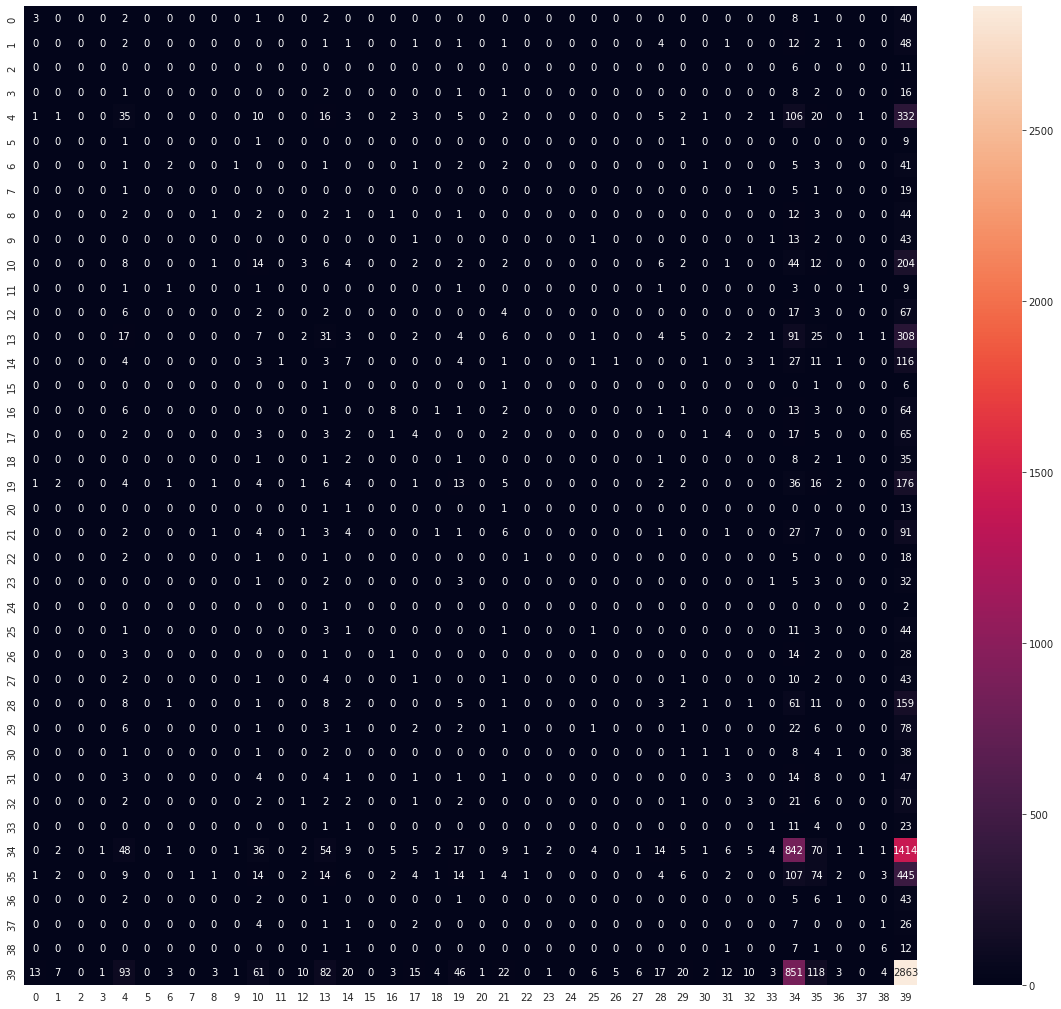

In [60]:
# Classification Accuracy
print('Accuracy on Training data:',logit.score(X_train_transformed, y_train))
print('Accuracy on Test data:',logit.score(X_test_transformed, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, logit_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, logit_pred, labels=list(range(0, 40)))
df_cm = pd.DataFrame(cm, index = [i for i in list(range(0, 40))],
                  columns = [i for i in list(range(0, 40))])
plt.figure(figsize = (20,18))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

**Evaluation metrics allow us to estimate errors to determine how well our models are performing:**

> Accuracy: ratio of correct predictions over total predictions.

> Precision: how often the classifier is correct when it predicts positive.

> Recall: how often the classifier is correct for all positive instances.

> F-Score: single measurement to combine precision and recall.

## 4. Improve performance of Model

### 4A. Experiment with other vectorisers.

### 4B. Build classifier Models using other algorithms than base model.

### 4C. Tune Parameters/Hyperparameters of the model/s.

### 4D. Clearly print Performance Metrics.
- Hint: Accuracy, Precision, Recall, ROC-AUC

**Considering all the above 4 parts in below 6 cases: Except case-1, the code has been commented after testing because of high RAM issues and long training times.**

### Case-1: Using the CountVectorizer

In [61]:
vect.fit(X)
X = vect.transform(X)

In [62]:
X

<57329x23742 sparse matrix of type '<class 'numpy.int64'>'
	with 3238564 stored elements in Compressed Sparse Row format>

Select the best performing model

In [63]:
# Use K-Fold Cross Validation for model selection
# Define various classification models
LogisticRegression = LogisticRegression(n_jobs=1, C=1e5)
SGDClassifier = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
MultinomialNB = MultinomialNB()

LogisticRegression: 0.309425 (0.005461)
SGDClassifier: 0.334944 (0.012838)
MultinomialNB: 0.365836 (0.001973)


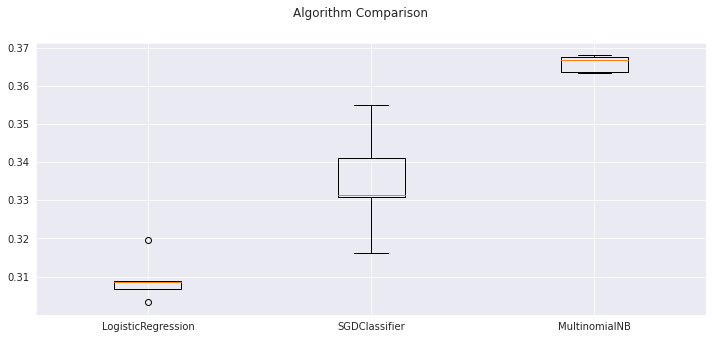

In [64]:
# K Fold Cross Validation Scores

seed = 0

# Create models
models = []
models.append(('LogisticRegression', LogisticRegression))
models.append(('SGDClassifier', SGDClassifier))
models.append(('MultinomialNB', MultinomialNB))

# Evaluate each model in turn
results = []
names = []

# Use different metrics based on context
scoring = 'accuracy'
# scoring = 'precision'
# scoring = 'recall'
# scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# Boxplot for algorithm comparison
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Using the Artificial Neural Network (ANN)

In [65]:
# Encoding is used for categorical data
# We can consider 3,4,5,6,7,8 as categorical
# Use one hot encoding
y_train_dum = pd.get_dummies(y_train).to_numpy()
y_test_dum = pd.get_dummies(y_test).to_numpy()

In [66]:
y_train_dum

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [67]:
print(X_train_transformed.shape,X_test_transformed.shape)
print(y_train_dum.shape,y_test_dum.shape)

(45863, 23742) (11466, 23742)
(45863, 40) (11466, 40)


In [68]:
n_inputs = X_train_transformed.shape[1]
n_outputs = y_train_dum.shape[1]

model_nn = Sequential()
model_nn.add(Dense(512, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model_nn.add(BatchNormalization())

# The Hidden Layers :
model_nn.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dense(128, kernel_initializer='he_uniform',activation='relu')) 
model_nn.add(BatchNormalization())

# the output layer
model_nn.add(Dense(n_outputs, activation='sigmoid'))
model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy','categorical_crossentropy'])

# stop = EarlyStopping(monitor="val_loss", patience=3, min_delta=0.01)
model_nn.fit(X_train_transformed, y_train_dum, validation_data=(X_test_transformed,y_test_dum), verbose=1, epochs=20, batch_size = 64)
# model_nn.fit(X_train_transformed, y_train_dum, validation_data=(X_test_transformed,y_test_dum), verbose=1, epochs=8, batch_size = 64, callbacks=[stop])

Epoch 1/20
717/717 [==============================] - 97s 133ms/step - loss: 2.5387 - accuracy: 0.3519 - categorical_crossentropy: 2.5387 - val_loss: 2.2337 - val_accuracy: 0.3886 - val_categorical_crossentropy: 2.2337
Epoch 2/20
717/717 [==============================] - 95s 132ms/step - loss: 1.8307 - accuracy: 0.4827 - categorical_crossentropy: 1.8307 - val_loss: 2.4269 - val_accuracy: 0.3447 - val_categorical_crossentropy: 2.4269
Epoch 3/20
717/717 [==============================] - 95s 133ms/step - loss: 1.0601 - accuracy: 0.7013 - categorical_crossentropy: 1.0601 - val_loss: 2.8935 - val_accuracy: 0.3374 - val_categorical_crossentropy: 2.8935
Epoch 4/20
717/717 [==============================] - 94s 132ms/step - loss: 0.5592 - accuracy: 0.8446 - categorical_crossentropy: 0.5592 - val_loss: 3.4047 - val_accuracy: 0.3139 - val_categorical_crossentropy: 3.4047
Epoch 5/20
717/717 [==============================] - 94s 131ms/step - loss: 0.3480 - accuracy: 0.9064 - categorical_crossen

In [69]:
y_pred=model_nn.predict(X_test_transformed)
y_pred

359/359 [==============================] - 2s 4ms/step


array([[7.4354494e-01, 4.8967334e-03, 5.0696519e-05, ..., 4.9624829e-05,
        5.2578371e-02, 9.9981177e-01],
       [8.8578957e-01, 9.9479645e-01, 9.0660691e-02, ..., 9.6454144e-01,
        3.0041838e-04, 9.9999708e-01],
       [3.3599386e-04, 3.8007479e-02, 3.3285858e-05, ..., 4.1414327e-03,
        2.2525650e-03, 9.9999547e-01],
       ...,
       [1.9597812e-01, 4.1979294e-02, 3.1389636e-03, ..., 1.3833356e-03,
        3.1388503e-01, 9.9998695e-01],
       [3.3773903e-02, 9.4582254e-01, 3.0521068e-01, ..., 7.3651379e-01,
        8.9372834e-03, 9.9995190e-01],
       [9.9737799e-01, 7.8910578e-04, 2.0770347e-01, ..., 1.8206217e-03,
        2.8884554e-01, 9.9996281e-01]], dtype=float32)

1434/1434 [==============================] - 7s 5ms/step - loss: 0.0653 - accuracy: 0.9797 - categorical_crossentropy: 0.0653
Loss and Accuracy on Training data: [0.06534141302108765, 0.9797003865242004, 0.06534141302108765]
359/359 [==============================] - 2s 7ms/step - loss: 5.7393 - accuracy: 0.3045 - categorical_crossentropy: 5.7393
Loss and Accuracy on Test data: [5.739269256591797, 0.3044653832912445, 5.739269256591797]

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.05      0.07        57
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        31
           4       0.11      0.07      0.08       548
           5       0.00      0.00      0.00        12
           6       0.08      0.03      0.05        60
           7       0.00      0.00      0.00        27
           8       0.07      0.04      0.06     

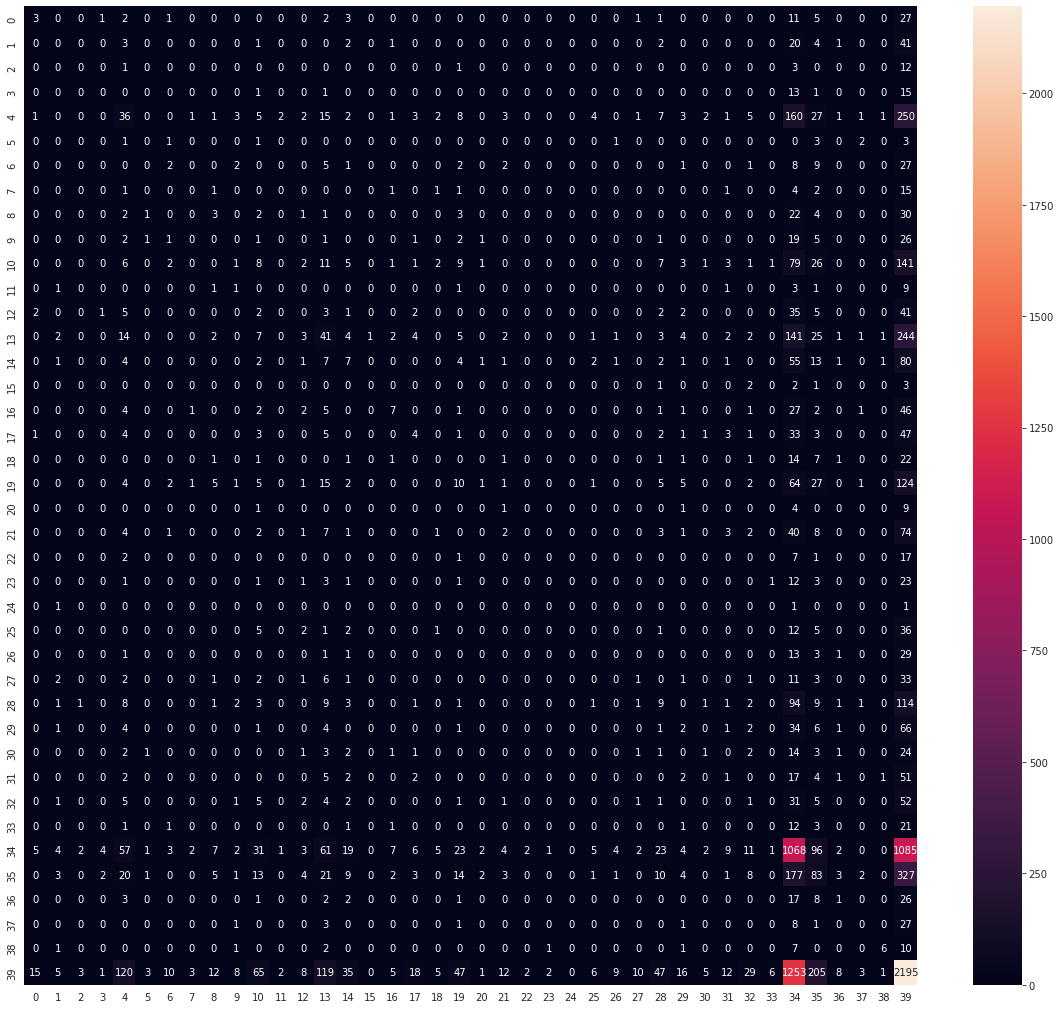

In [70]:
# Classification Accuracy
print('Loss and Accuracy on Training data:',model_nn.evaluate(X_train_transformed, y_train_dum))
print('Loss and Accuracy on Test data:',model_nn.evaluate(X_test_transformed, y_test_dum))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test_dum.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test_dum.argmax(axis=1), y_pred.argmax(axis=1), labels=list(range(0, 40)))
df_cm = pd.DataFrame(cm, index = [i for i in list(range(0, 40))],
                  columns = [i for i in list(range(0, 40))])
plt.figure(figsize = (20,18))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

### Case-2: Using the TfIdfVectorizer

In [71]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
# # Instantiate the vectorizer
# # Creating bag of words which include 1-grams and 2-gram

# vect = TfidfVectorizer(ngram_range=(1,2), analyzer=lambda x: x)

# # Learn training data vocabulary, then use it to create a document-term matrix
# vect.fit(X_train)
# X_train_transformed = vect.transform(X_train).toarray()
# X_test_transformed = vect.transform(X_test).toarray()

# print('The shape of the train data after vectorization is',X_train_transformed.shape)
# print('The shape of the test data after vectorization is',X_test_transformed.shape)

In [73]:
# X=dfa.clean_data

# vect.fit(X)
# X = vect.transform(X)

In [74]:
# X

Select the best performing model

In [75]:
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.naive_bayes import MultinomialNB

In [76]:
# # Use K-Fold Cross Validation for model selection
# # Define various classification models
# LogisticRegression = LogisticRegression(n_jobs=1, C=1e5)
# SGDClassifier = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
# MultinomialNB = MultinomialNB()

In [77]:
# # K Fold Cross Validation Scores

# seed = 0

# # Create models
# models = []
# models.append(('LogisticRegression', LogisticRegression))
# models.append(('SGDClassifier', SGDClassifier))
# models.append(('MultinomialNB', MultinomialNB))

# # Evaluate each model in turn
# results = []
# names = []

# # Use different metrics based on context
# scoring = 'accuracy'
# # scoring = 'precision'
# # scoring = 'recall'
# # scoring = 'f1'
# for name, model in models:
# 	kfold = model_selection.KFold(n_splits=5,random_state=seed,shuffle=True)
# 	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)
    
# # Boxplot for algorithm comparison
# fig = plt.figure(figsize=(12,5))
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

Using the Artificial Neural Network (ANN)

In [78]:
# print(X_train_transformed.shape,X_test_transformed.shape)
# print(y_train_dum.shape,y_test_dum.shape)

In [79]:
# n_inputs = X_train_transformed.shape[1]
# n_outputs = y_train_dum.shape[1]

# model_nn = Sequential()
# model_nn.add(Dense(512, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
# model_nn.add(BatchNormalization())

# # The Hidden Layers :
# model_nn.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
# model_nn.add(BatchNormalization())
# model_nn.add(Dense(128, kernel_initializer='he_uniform',activation='relu')) 
# model_nn.add(BatchNormalization())

# # the output layer
# model_nn.add(Dense(n_outputs, activation='sigmoid'))
# model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy','categorical_crossentropy'])

# # stop = EarlyStopping(monitor="val_loss", patience=3, min_delta=0.01)
# model_nn.fit(X_train_transformed, y_train_dum, validation_data=(X_test_transformed,y_test_dum), verbose=1, epochs=20, batch_size = 64)
# # model_nn.fit(X_train_transformed, y_train_dum, validation_data=(X_test_transformed,y_test_dum), verbose=1, epochs=8, batch_size = 64, callbacks=[stop])

In [80]:
# y_pred=model_nn.predict(X_test_transformed)
# y_pred

In [81]:
# # Classification Accuracy
# print('Loss and Accuracy on Training data:',model_nn.evaluate(X_train_transformed, y_train_dum))
# print('Loss and Accuracy on Test data:',model_nn.evaluate(X_test_transformed, y_test_dum))
# print()

# # Classification Report
# print("Classification Report:\n",classification_report(y_test_dum.argmax(axis=1), y_pred.argmax(axis=1)))

# # Confusion Matrix
# print("Confusion Matrix Chart:")
# cm = confusion_matrix(y_test_dum.argmax(axis=1), y_pred.argmax(axis=1), labels=list(range(0, 40)))
# df_cm = pd.DataFrame(cm, index = [i for i in list(range(0, 40))],
#                   columns = [i for i in list(range(0, 40))])
# plt.figure(figsize = (20,18))
# sns.heatmap(df_cm, annot=True, fmt='g')
# plt.show()

### Case-3: Using the HashingVectorizer

In [82]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
# # Instantiate the vectorizer
# # Creating bag of words which include 1-grams and 2-gram

# vect = TfidfVectorizer(ngram_range=(1,2), analyzer=lambda x: x)

# # Learn training data vocabulary, then use it to create a document-term matrix
# vect.fit(X_train)
# X_train_transformed = vect.transform(X_train).toarray()
# X_test_transformed = vect.transform(X_test).toarray()

# print('The shape of the train data after vectorization is',X_train_transformed.shape)
# print('The shape of the test data after vectorization is',X_test_transformed.shape)

In [84]:
# X=dfa.clean_data

# vect.fit(X)
# X = vect.transform(X)

In [85]:
# X

Select the best performing model

In [86]:
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.naive_bayes import MultinomialNB

In [87]:
# # Use K-Fold Cross Validation for model selection
# # Define various classification models
# LogisticRegression = LogisticRegression(n_jobs=1, C=1e5)
# SGDClassifier = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
# MultinomialNB = MultinomialNB()

In [88]:
# # K Fold Cross Validation Scores

# seed = 0

# # Create models
# models = []
# models.append(('LogisticRegression', LogisticRegression))
# models.append(('SGDClassifier', SGDClassifier))
# models.append(('MultinomialNB', MultinomialNB))

# # Evaluate each model in turn
# results = []
# names = []

# # Use different metrics based on context
# scoring = 'accuracy'
# # scoring = 'precision'
# # scoring = 'recall'
# # scoring = 'f1'
# for name, model in models:
# 	kfold = model_selection.KFold(n_splits=5,random_state=seed,shuffle=True)
# 	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)
    
# # Boxplot for algorithm comparison
# fig = plt.figure(figsize=(12,5))
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

Using the Artificial Neural Network (ANN)

In [89]:
# print(X_train_transformed.shape,X_test_transformed.shape)
# print(y_train_dum.shape,y_test_dum.shape)

In [90]:
# n_inputs = X_train_transformed.shape[1]
# n_outputs = y_train_dum.shape[1]

# model_nn = Sequential()
# model_nn.add(Dense(512, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
# model_nn.add(BatchNormalization())

# # The Hidden Layers :
# model_nn.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
# model_nn.add(BatchNormalization())
# model_nn.add(Dense(128, kernel_initializer='he_uniform',activation='relu')) 
# model_nn.add(BatchNormalization())

# # the output layer
# model_nn.add(Dense(n_outputs, activation='sigmoid'))
# model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy','categorical_crossentropy'])

# # stop = EarlyStopping(monitor="val_loss", patience=3, min_delta=0.01)
# model_nn.fit(X_train_transformed, y_train_dum, validation_data=(X_test_transformed,y_test_dum), verbose=1, epochs=20, batch_size = 64)
# # model_nn.fit(X_train_transformed, y_train_dum, validation_data=(X_test_transformed,y_test_dum), verbose=1, epochs=8, batch_size = 64, callbacks=[stop])

In [91]:
# y_pred=model_nn.predict(X_test_transformed)
# y_pred

In [92]:
# # Classification Accuracy
# print('Loss and Accuracy on Training data:',model_nn.evaluate(X_train_transformed, y_train_dum))
# print('Loss and Accuracy on Test data:',model_nn.evaluate(X_test_transformed, y_test_dum))
# print()

# # Classification Report
# print("Classification Report:\n",classification_report(y_test_dum.argmax(axis=1), y_pred.argmax(axis=1)))

# # Confusion Matrix
# print("Confusion Matrix Chart:")
# cm = confusion_matrix(y_test_dum.argmax(axis=1), y_pred.argmax(axis=1), labels=list(range(0, 40)))
# df_cm = pd.DataFrame(cm, index = [i for i in list(range(0, 40))],
#                   columns = [i for i in list(range(0, 40))])
# plt.figure(figsize = (20,18))
# sns.heatmap(df_cm, annot=True, fmt='g')
# plt.show()

### Case-4: Using the Word2Vec Model

In [93]:
# # X_train_final_tokens = X_train.apply(nltk.word_tokenize)
# X_train_tokens_list = X_train.tolist()

In [94]:
# X_train_tokens_list

In [95]:
# # X_test_final_tokens = X_test.apply(nltk.word_tokenize)
# X_test_tokens_list = X_test.tolist()

In [96]:
# %%time

# from gensim.models import Word2Vec

# wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
# wv.init_sims(replace=True)

In [97]:
# from itertools import islice
# list(islice(wv.vocab, 13030, 13050))

In [98]:
# # The common way is to average the two word vectors. BOW based approaches which includes averaging.
# def word_averaging(wv, words):
#     all_words, mean = set(), []
    
#     for word in words:
#         if isinstance(word, np.ndarray):
#             mean.append(word)
#         elif word in wv.vocab:
#             mean.append(wv.syn0norm[wv.vocab[word].index])
#             all_words.add(wv.vocab[word].index)

#     if not mean:
#         logging.warning("cannot compute similarity with no input %s", words)
#         # FIXME: remove these examples in pre-processing
#         return np.zeros(wv.vector_size,)

#     mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
#     return mean

# def  word_averaging_list(wv, text_list):
#     return np.vstack([word_averaging(wv, post) for post in text_list ])

In [99]:
# X_train_word_average = word_averaging_list(wv,X_train_tokens_list)
# X_test_word_average = word_averaging_list(wv,X_test_tokens_list)

In [100]:
# # Build the Logistic Regression model
# logit = LogisticRegression()

# # Train the model
# logit.fit(X_train_word_average, y_train)
# logit_pred = logit.predict(X_test_word_average)

In [101]:
# # Classification Accuracy
# print('Accuracy on Training data:',logit.score(X_train_word_average, y_train))
# print('Accuracy on Test data:',logit.score(X_test_word_average, y_test))

# # Classification Report
# print("Classification Report:\n",classification_report(y_test, logit_pred))

# # Confusion Matrix
# print("Confusion Matrix Chart:")
# cm = confusion_matrix(y_test, logit_pred, labels=list(range(0, 40)))
# df_cm = pd.DataFrame(cm, index = [i for i in list(range(0, 40))],
#                   columns = [i for i in list(range(0, 40))])
# plt.figure(figsize = (20,18))
# sns.heatmap(df_cm, annot=True, fmt='g')
# plt.show()

### Case-5: Using the Glove Model

In [102]:
# import tensorflow
# from tensorflow import keras

In [103]:
# %%time

# glove_embeddings = {}
# with open("glove.840B.300d.txt") as f:
#     for line in f:
#         try:
#             line = line.split()
#             glove_embeddings[line[0]] = np.array(line[1:], dtype=np.float32)
#         except:
#             continue

In [104]:
# embeddings = glove_embeddings["the"]

# embeddings.shape, embeddings.dtype

In [105]:
# from keras.preprocessing.text import Tokenizer
# from keras_preprocessing.sequence import pad_sequences

# max_tokens = 100 ## Hyperparameter

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X)

# ## Vectorizing data to keep 50 words per sample.
# X_train_vect = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_tokens, padding="post", truncating="post", value=0.)
# X_test_vect  = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_tokens, padding="post", truncating="post", value=0.)

# print(X_train_vect[:3])

# X_train_vect.shape, X_test_vect.shape

In [106]:
# print("Vocab Size : {}".format(len(tokenizer.word_index)))

In [107]:
# ## What is word 13

# print(tokenizer.index_word[13])

# ## How many times it comes in first text document??

# print(X_train[1]) ## 2 times

In [108]:
# %%time

# embed_len = 300

# word_embeddings = np.zeros((len(tokenizer.index_word)+1, embed_len))

# for idx, word in tokenizer.index_word.items():
#     word_embeddings[idx] = glove_embeddings.get(word, np.zeros(embed_len))

In [109]:
# word_embeddings[1][:10]

In [110]:
# # Define Network
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Flatten

# model = Sequential([
#                     Embedding(input_dim=len(tokenizer.index_word)+1, output_dim=embed_len,
#                               input_length=max_tokens, trainable=False, weights=[word_embeddings]),
#                     Flatten(),
#                     Dense(128, activation="relu"),
#                     Dense(64, activation="relu"),
#                     Dense(len(dfa.topic), activation="softmax")
#                 ])

# model.summary()

In [111]:
# model.weights[0][1][:10], word_embeddings[1][:10]

In [112]:
# # Compile Network
# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [113]:
# # Train Network
# model.fit(X_train_vect, y_train, batch_size=32, epochs=8, validation_data=(X_test_vect, y_test))

In [114]:
# y_pred = model.predict(X_test_vect).argmax(axis=-1)

# # Classification Accuracy
# print('Loss and Accuracy on Training data:',model.evaluate(X_train_vect, y_train))
# print('Loss and Accuracy on Test data:',model.evaluate(X_test_vect, y_test))
# print()

# # Classification Report
# print("Classification Report:\n",classification_report(y_test, y_pred))

# # Confusion Matrix
# print("Confusion Matrix Chart:")
# cm = confusion_matrix(y_test, y_pred, labels=list(range(0, 40)))
# df_cm = pd.DataFrame(cm, index = [i for i in list(range(0, 40))],
#                   columns = [i for i in list(range(0, 40))])
# plt.figure(figsize = (20,18))
# sns.heatmap(df_cm, annot=True, fmt='g')
# plt.show()

### Case-6: Hyperparameter Tuning
Using the Logistic Regression classifier as its giving a better performance.

In [115]:
from sklearn.linear_model import LogisticRegression

# Build the Logistic Regression model
logit = LogisticRegression()

# Train the model
logit.fit(X_train_transformed, y_train)
logit_pred = logit.predict(X_test_transformed)

Accuracy on Training data: 0.66740073697752
Accuracy on Test data: 0.34222919937205654
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.05      0.08        57
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        31
           4       0.13      0.06      0.09       548
           5       0.00      0.00      0.00        12
           6       0.22      0.03      0.06        60
           7       0.00      0.00      0.00        27
           8       0.12      0.01      0.03        69
           9       0.00      0.00      0.00        61
          10       0.08      0.05      0.06       311
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00       101
          13       0.12      0.06      0.08       513
          14       0.09      0.04      0.05       185
          15       0.00 

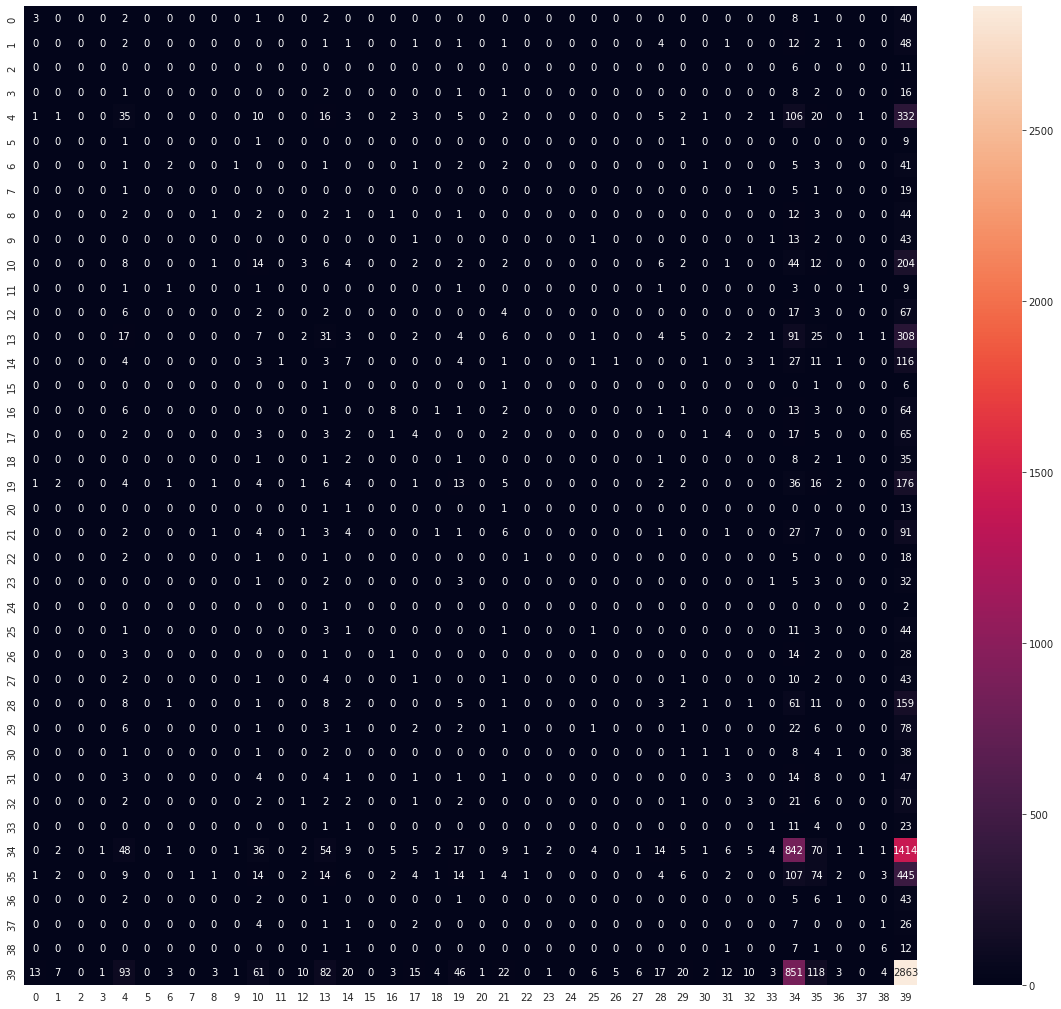

In [116]:
# Classification Accuracy
print('Accuracy on Training data:',logit.score(X_train_transformed, y_train))
print('Accuracy on Test data:',logit.score(X_test_transformed, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, logit_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, logit_pred, labels=list(range(0, 40)))
df_cm = pd.DataFrame(cm, index = [i for i in list(range(0, 40))],
                  columns = [i for i in list(range(0, 40))])
plt.figure(figsize = (20,18))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

Not using all the hyperparameters due to long running times in RandomizedSearchCV:

In [117]:
%%time
# Using the RandomizedSearchCV
# params =     {'penalty' : ['l1', 'l2'],
#               'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#               'solver' : ['lbfgs','liblinear','sag','saga'],
#               }

params =     {'penalty' : ['l1', 'l2'],
              'C' : [1, 10]
              }

gs = RandomizedSearchCV(estimator=logit, param_distributions=params, cv=5, verbose=10, random_state=0)
gs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=1, penalty=l1.............................................
[CV 1/5; 1/4] END ................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/4] START C=1, penalty=l1.............................................
[CV 2/5; 1/4] END ................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/4] START C=1, penalty=l1.............................................
[CV 3/5; 1/4] END ................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/4] START C=1, penalty=l1.............................................
[CV 4/5; 1/4] END ................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/4] START C=1, penalty=l1.............................................
[CV 5/5; 1/4] END ................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/4] START C=1, penalty=l2.............................................
[CV 1/5; 2/4] END ..............C=1, penalty=l2;,

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10], 'penalty': ['l1', 'l2']},
                   random_state=0, verbose=10)

In [118]:
pd.DataFrame({'param': gs.cv_results_["params"], 
              'score mean': gs.cv_results_["mean_test_score"], 
              'score s.d.': gs.cv_results_["std_test_score"],
              'rank': gs.cv_results_["rank_test_score"]})

,param,score mean,score s.d.,rank
0,"{'penalty': 'l1', 'C': 1}",NaN,NaN,3
1,"{'penalty': 'l2', 'C': 1}",0.333580,0.001911,1
2,"{'penalty': 'l1', 'C': 10}",NaN,NaN,4
3,"{'penalty': 'l2', 'C': 10}",0.308331,0.003786,2


In [119]:
# Print the best parameters
print('Best Parameters:', gs.best_params_, 'mean score: ', gs.best_score_, sep='\n')

Best Parameters:
{'penalty': 'l2', 'C': 1}
mean score: 
0.33358040047088267


In [120]:
# Build the Logistic Regression model
logit = LogisticRegression(penalty = 'l2', C = 1)

# Train the model
logit.fit(X_train_transformed, y_train)
logit_pred = logit.predict(X_test_transformed)

Accuracy on Training data: 0.66740073697752
Accuracy on Test data: 0.34222919937205654
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.05      0.08        57
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        31
           4       0.13      0.06      0.09       548
           5       0.00      0.00      0.00        12
           6       0.22      0.03      0.06        60
           7       0.00      0.00      0.00        27
           8       0.12      0.01      0.03        69
           9       0.00      0.00      0.00        61
          10       0.08      0.05      0.06       311
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00       101
          13       0.12      0.06      0.08       513
          14       0.09      0.04      0.05       185
          15       0.00 

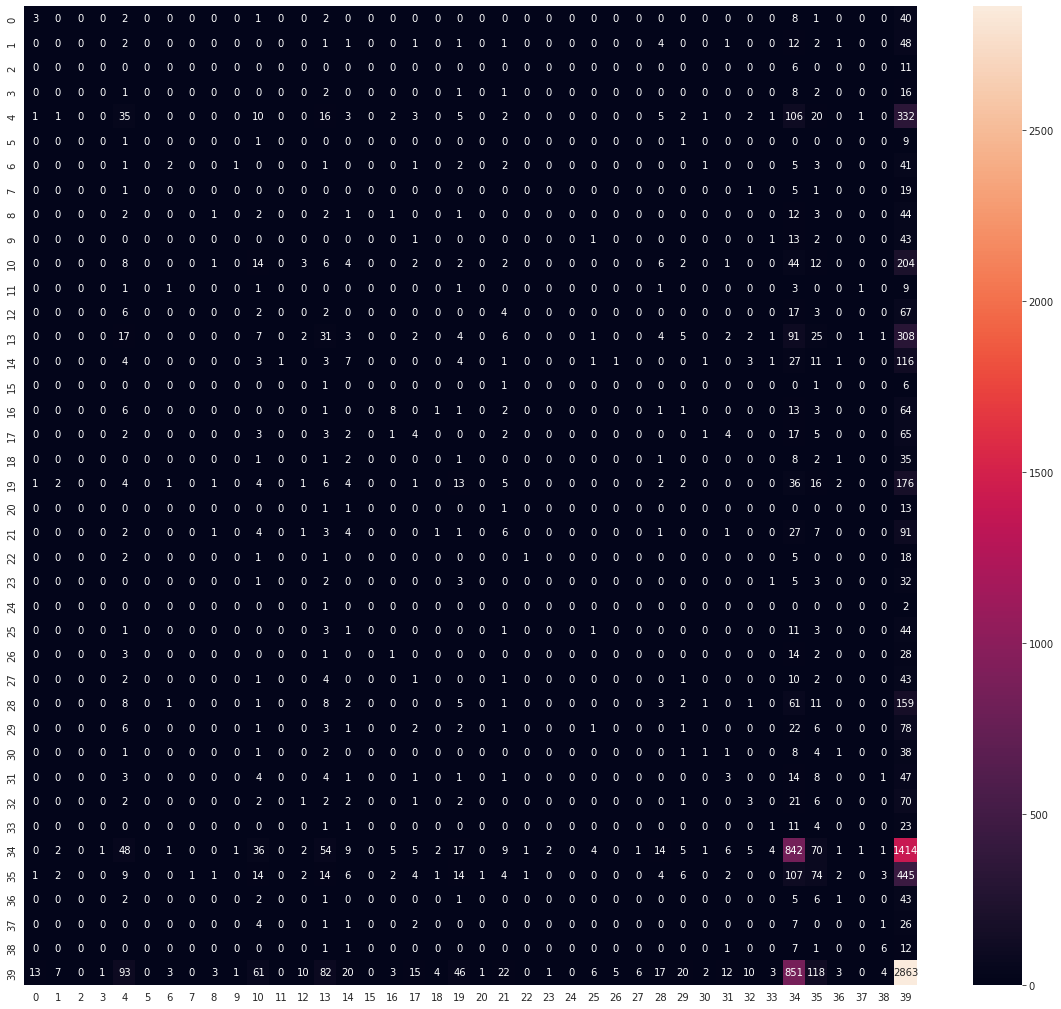

In [121]:
# Classification Accuracy
print('Accuracy on Training data:',logit.score(X_train_transformed, y_train))
print('Accuracy on Test data:',logit.score(X_test_transformed, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, logit_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, logit_pred, labels=list(range(0, 40)))
df_cm = pd.DataFrame(cm, index = [i for i in list(range(0, 40))],
                  columns = [i for i in list(range(0, 40))])
plt.figure(figsize = (20,18))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

From the above metrics; Its evident that Logistic regression with default parameters is giving a better performance.

## 5. Share insights on relative performance comparison

### 5A. Which vectorizer performed better? Probable reason?

I found that CountVectorizer worked better than TfIdfVectorizer.

Secondly, as we increase the ngram-range parameter of both CountVectorizer and TfIdfVectorizer, ideally accuracy of TfIdf improves over CountVectorizer. I would compare performance across folds (cross validation) to make sure countvectorizer consistently performs better.

Count Vectors can be helpful in understanding the type of text by the frequency of words in it. But its major disadvantages are:

- Its inability in identifying more important and less important words for analysis.
- It will just consider words that are abundant in a corpus as the most statistically significant word.
- It also doesn't identify the relationships between words such as linguistic similarity between words.


### 5B. Which model outperformed? Probable reason?

As we are using a small data sample here the Logistic Regression is performng better than ANN.

we need a good ratio of data points to parameters to get reliable estimates so the first criteria would be lots of data in order to estimate lots of parameters. If that's not true then we'd be estimating lots of parameters with little data per parameter and get a bunch of spurious results. Therefore depending upon the situation, the additional granularity of the Deep Neural Network would either represent a treasure trove of additional detail and value, or an error prone and misleading representation of the situation. 

### 5C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?

The main hyperparameters we may tune in logistic regression are: solver, penalty, and regularization strength (sklearn documentation).

1. **Solver** is the algorithm to use in the optimization problem. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’.

 - lbfgs: relatively performs well compared to other methods and it saves a lot of memory, however, sometimes it may have issues with convergence.
 - sag: faster than other solvers for large datasets, when both the number of samples and the number of features are large.
 - saga: the solver of choice for sparse multinomial logistic regression and it’s also suitable for very large datasets.
 - newton-cg: computationally expensive because of the Hessian Matrix.
 - liblinear: recommended when you have a high dimension dataset - solving large-scale classification problems.

2. **Penalty (or regularization)** intends to reduce model generalization error, and is meant to disincentivize and regulate overfitting. Technique discourages learning a more complex model, so as to avoid the risk of overfitting. The choices are: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’.

3. **C (or regularization strength)** must be a positive float. Regularization strength works with the penalty to regulate overfitting. Smaller values specify stronger regularization and high value tells the model to give high weight to the training data.

4. **Logistic regression offers other parameters like:** class_weight, dualbool (for sparse datasets when n_samples > n_features), max_iter (may improve convergence with higher iterations), and others. However, these provide less impact.

### 5D. According to you, which performance metric should be given most importance, why?

Besides the ROC-AUC and Kohonen's kappa as the metircs for imbalanced dataset with multiclass classification, I'd also like to add a few metrics I've found useful for imbalanced data. They are both related to precision and recall. Because by averaging these you get a metric weighing TPs and both types of errors (FP and FN):

- F1 score, which is the harmonic mean of precision and recall.
- G-measure, which is the geometric mean of precision and recall. Compared to F1, I've found it a bit better for imbalanced data.
- Jaccard index, which you can think of as the TP/(TP+FP+FN)

Note: For imbalanced datasets, it is best to have your metrics be macro-averaged.

# Part-B: Solution

- **DOMAIN:** Customer support
- **CONTEXT:** Great Learning has a an academic support department which receives numerous support requests every day throughout the year. Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with the user, understand the problem and display the resolution procedure if found as a generic request or redirect the request to an actual human support executive if the request is complex or not in it’s database.
- **DATA DESCRIPTION:** A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.
- **PROJECT OBJECTIVE:** Design a python based interactive semi - rule based chatbot which can do the following:

## 1. Start chat session with greetings and ask what the user is looking for.

## 2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.

## 3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.
Hint: There are a lot of techniques using which one can clean and prepare the data which can be used to train a ML/DL classifier. Hence, it might require you to experiment, research, self learn and implement the above classifier. There might be many iterations between hand building the corpus and designing the best fit text classifier. As the quality and quantity of corpus increases the model’s performance i.e. ability to answer right questions also increases.
Reference: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/

## 4. Evaluation: Evaluator will use linguistics to twist and turn sentences to ask questions on the topics described in DATA DESCRIPTION and check if the bot is giving relevant replies.

## Import packages

This is a generic chatbot. Can be trained on pretty much any conversation as long as we have a correctly formatted JSON file.

In [1]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import zscore

# Using ML
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, plot_roc_curve 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
import pandas_profiling as pp

import gensim
import logging

# Using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

# Using torch
import torch
import torch.nn as nn
import random

from torch.utils.data import Dataset, DataLoader
from tkinter import *

import warnings
warnings.filterwarnings("ignore")

import random
from zipfile import ZipFile

# Set random_state
random_state = 42

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Current working directory
%cd "/content/drive/MyDrive/MGL/Project-NLP-1/"

# # List all the files in a directory
# for dirname, _, filenames in os.walk('path'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

/content/drive/MyDrive/MGL/Project-NLP-1


In [4]:
# List files in the directory
!ls

 blogs.zip	     'GL Bot.json'		     P-1.ipynb
 blogtext.csv	     'Milestone-NLP 1.pdf'	     P-2.ipynb
'Copy of P-1.ipynb'  'NLP-1_Problem Statement.pdf'  'REVALUATION POLICY-6.pdf'
 data.pth	     'NLP FAQ Stat.pdf'


## Quick EDA

In [5]:
# Creat dataframe from the json file
with open('GL Bot.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [6]:
pd.set_option('display.max_colwidth', None)
df.head()

,intents
0,"{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}"
1,"{'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}"
2,"{'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with olympus', 'olypus is not a good tool', 'lot of problems with olympus', 'how to use olympus', 'teach me olympus'], 'responses': ['Link: Olympus wiki'], 'context_set': ''}"
3,"{'tag': 'SL', 'patterns': ['i am not able to understand svm', 'explain me how machine learning works', 'i am not able to understand naive bayes', 'i am not able to understand logistic regression', 'i am not able to understand ensemble techb=niques', 'i am not able to understand knn', 'i am not able to understand knn imputer', 'i am not able to understand cross validation', 'i am not able to understand boosting', 'i am not able to understand random forest', 'i am not able to understand ada boosting', 'i am not able to understand gradient boosting', 'machine learning', 'ML', 'SL', 'supervised learning', 'knn', 'logistic regression', 'regression', 'classification', 'naive bayes', 'nb', 'ensemble techniques', 'bagging', 'boosting', 'ada boosting', 'ada', 'gradient boosting', 'hyper parameters'], 'responses': ['Link: Machine Learning wiki '], 'context_set': ''}"
4,"{'tag': 'NN', 'patterns': ['what is deep learning', 'unable to understand deep learning', 'explain me how deep learning works', 'i am not able to understand deep learning', 'not able to understand neural nets', 'very diffult to understand neural nets', 'unable to understand neural nets', 'ann', 'artificial intelligence', 'artificial neural networks', 'weights', 'activation function', 'hidden layers', 'softmax', 'sigmoid', 'relu', 'otimizer', 'forward propagation', 'backward propagation', 'epochs', 'epoch', 'what is an epoch', 'adam', 'sgd'], 'responses': ['Link: Neural Nets wiki'], 'context_set': ''}"


In [7]:
df1 = df.intents.apply(pd.Series)
df1

,tag,patterns,responses,context_set
0,Intro,"[hi, how are you, is anyone there, hello, whats up, hey, yo, listen, please help me, i am learner from, i belong to, aiml batch, aifl batch, i am from, my pm is, blended, online, i am from, hey ya, talking to you for first time]",[Hello! how can i help you ?],
1,Exit,"[thank you, thanks, cya, see you, later, see you later, goodbye, i am leaving, have a Good day, you helped me, thanks a lot, thanks a ton, you are the best, great help, too good, you are a good learning buddy]","[I hope I was able to assist you, Good Bye]",
2,Olympus,"[olympus, explain me how olympus works, I am not able to understand olympus, olympus window not working, no access to olympus, unable to see link in olympus, no link visible on olympus, whom to contact for olympus, lot of problem with olympus, olypus is not a good tool, lot of problems with olympus, how to use olympus, teach me olympus]",[Link: Olympus wiki],
3,SL,"[i am not able to understand svm, explain me how machine learning works, i am not able to understand naive bayes, i am not able to understand logistic regression, i am not able to understand ensemble techb=niques, i am not able to understand knn, i am not able to understand knn imputer, i am not able to understand cross validation, i am not able to understand boosting, i am not able to understand random forest, i am not able to understand ada boosting, i am not able to understand gradient boosting, machine learning, ML, SL, supervised learning, knn, logistic regression, regression, classification, naive bayes, nb, ensemble techniques, bagging, boosting, ada boosting, ada, gradient boosting, hyper parameters]",[Link: Machine Learning wiki ],
4,NN,"[what is deep learning, unable to understand deep learning, explain me how deep learning works, i am not able to understand deep learning, not able to understand neural nets, very diffult to understand neural nets, unable to understand neural nets, ann, artificial intelligence, artificial neural networks, weights, activation function, hidden layers, softmax, sigmoid, relu, otimizer, forward propagation, backward propagation, epochs, epoch, what is an epoch, adam, sgd]",[Link: Neural Nets wiki],
5,Bot,"[what is your name, who are you, name please, when are your hours of opertions, what are your working hours, hours of operation, working hours, hours]",[I am your virtual learning assistant],
6,Profane,"[what the hell, bloody stupid bot, do you think you are very smart, screw you, i hate you, you are stupid, jerk, you are a joke, useless piece of shit]",[Please use respectful words],
7,Ticket,"[my problem is not solved, you did not help me, not a good solution, bad solution, not good solution, no help, wasted my time, useless bot, create a ticket]",[Tarnsferring the request to your PM],


## NLTK Packs

In [8]:
# Download the relevant content from NLTK
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## Load Data

In [9]:
# Load the data
with open("GL Bot.json", "r") as f:
    intents = json.load(f)

## Data Preprocessing

In [10]:
# Creating custom functions for tekenization. stemming, and BOW
stemmer = PorterStemmer()

def tokenize(sentence):
    return nltk.word_tokenize(sentence)
def stem(word):
    return stemmer.stem(word.lower())
def bag_of_words(tokenized_sentence, words):
    # stem each word
    sentence_words = [stem(word) for word in tokenized_sentence]
    # initialize bag with 0 for each word
    bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in sentence_words:
            bag[idx] = 1
    return bag

In [11]:
# Create xy pairs
all_words = []
tags = []
xy = []
# loop through each sentence in our intents patterns
for intent in intents["intents"]:
    tag = intent["tag"]
    # add to tag list
    tags.append(tag)
    for pattern in intent["patterns"]:
        # tokenize each word in the sentence
        w = tokenize(pattern)
        # add to our words list
        all_words.extend(w)
        # add to xy pair
        xy.append((w, tag))
print(xy)

[(['hi'], 'Intro'), (['how', 'are', 'you'], 'Intro'), (['is', 'anyone', 'there'], 'Intro'), (['hello'], 'Intro'), (['whats', 'up'], 'Intro'), (['hey'], 'Intro'), (['yo'], 'Intro'), (['listen'], 'Intro'), (['please', 'help', 'me'], 'Intro'), (['i', 'am', 'learner', 'from'], 'Intro'), (['i', 'belong', 'to'], 'Intro'), (['aiml', 'batch'], 'Intro'), (['aifl', 'batch'], 'Intro'), (['i', 'am', 'from'], 'Intro'), (['my', 'pm', 'is'], 'Intro'), (['blended'], 'Intro'), (['online'], 'Intro'), (['i', 'am', 'from'], 'Intro'), (['hey', 'ya'], 'Intro'), (['talking', 'to', 'you', 'for', 'first', 'time'], 'Intro'), (['thank', 'you'], 'Exit'), (['thanks'], 'Exit'), (['cya'], 'Exit'), (['see', 'you'], 'Exit'), (['later'], 'Exit'), (['see', 'you', 'later'], 'Exit'), (['goodbye'], 'Exit'), (['i', 'am', 'leaving'], 'Exit'), (['have', 'a', 'Good', 'day'], 'Exit'), (['you', 'helped', 'me'], 'Exit'), (['thanks', 'a', 'lot'], 'Exit'), (['thanks', 'a', 'ton'], 'Exit'), (['you', 'are', 'the', 'best'], 'Exit'), (

In [12]:
# Separate all the tags & words into their separate lists
# stem and lower each word
ignore_words = ["?", ".", "!"]
all_words = [stem(w) for w in all_words if w not in ignore_words]
# remove duplicates and sort
all_words = sorted(set(all_words))
tags = sorted(set(tags))
print(len(xy), "patterns")
print(len(tags), "tags:", tags)
print(len(all_words), "unique stemmed words:", all_words)

128 patterns
8 tags: ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
154 unique stemmed words: ['a', 'abl', 'access', 'activ', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyon', 'are', 'artifici', 'backward', 'bad', 'bag', 'batch', 'bay', 'belong', 'best', 'blend', 'bloodi', 'boost', 'bot', 'buddi', 'classif', 'contact', 'creat', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensembl', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodby', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imput', 'in', 'intellig', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learn', 'learner', 'leav', 'link', 'listen', 'logist', 'lot', 'machin', 'me', 'ml', 'my', 'naiv', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympu', 'olypu', 'on', 'onlin', 'oper', 'opert', 'otim', 'paramet', 'piec', 'pleas', 'pm', 'problem', 'propag', 'random', 'regre

## Train and Test data

In [13]:
# create training data
X_train = []
y_train = []
for (pattern_sentence, tag) in xy:
    # X: bag of words for each pattern_sentence
    bag = bag_of_words(pattern_sentence, all_words)
    X_train.append(bag)
    # y: PyTorch CrossEntropyLoss needs only class labels, not one-hot
    label = tags.index(tag)
    y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 5
 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7]


## NN Model

In [14]:
# Creating our model. Here we have inherited a class from NN.Module because we will be customizing the model & its layers
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out

In [15]:
# We will use some Magic functions, write our class. You can read online about getitem and setitem magic funtions
class ChatDataset(Dataset):
    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [16]:
# Hyper-parameters
num_epochs = 1000
batch_size = 8
learning_rate = 0.001
input_size = len(X_train[0])
hidden_size = 8
output_size = len(tags)
print(input_size, output_size)

154 8


In [17]:
# We will now instantiate the model, loss and optimizer functions.
dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNet(input_size, hidden_size, output_size).to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Model Training

In [18]:
# Train the model
for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)
        # Forward pass
        outputs = model(words)
        # if y would be one-hot, we must apply
        # labels = torch.max(labels, 1)[1]
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
data = {
    "model_state": model.state_dict(),
    "input_size": input_size,
    "hidden_size": hidden_size,
    "output_size": output_size,
    "all_words": all_words,
    "tags": tags,
}

Epoch [100/1000], Loss: 0.0185
Epoch [200/1000], Loss: 0.0036
Epoch [300/1000], Loss: 0.0007
Epoch [400/1000], Loss: 0.0003
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


In [19]:
# Saving the training model
FILE = "data.pth"
torch.save(data, FILE)

In [20]:
# Loading the model and data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
with open("GL Bot.json", "r") as json_data:
    intents = json.load(json_data)
FILE = "data.pth"
data = torch.load(FILE)
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data["all_words"]
tags = data["tags"]
model_state = data["model_state"]
model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

NeuralNet(
  (l1): Linear(in_features=154, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=8, bias=True)
  (relu): ReLU()
)

## Chatbot
Our Model is Ready. As our training data was very limited, we can only chat about a handful of topics. You can train it on a bigger dataset to increase the chatbot’s generalization / knowledge.

In [21]:
bot_name = "GLBot"
def get_response(msg):
    sentence = tokenize(msg)
    X = bag_of_words(sentence, all_words)
    X = X.reshape(1, X.shape[0])
    X = torch.from_numpy(X).to(device)
    output = model(X)
    _, predicted = torch.max(output, dim=1)
    tag = tags[predicted.item()]
    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]
    if prob.item() > 0.75:
        for intent in intents["intents"]:
            if tag == intent["tag"]:
                return random.choice(intent["responses"])
    return "Sorry, didn't get it..."

In [22]:
# Test the function
get_response('hi')

'Hello! how can i help you ?'

In [23]:
def chat():
    print("Start talking with the bot (type quit to stop)!")
    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
            break

        results = get_response(inp)
        # results_index = numpy.argmax(results)
        # tag = labels[results_index]

        # for tg in data["intents"]:
        #     if tg['tag'] == tag:
        #         responses = tg['responses']

        print(results)
chat()

Start talking with the bot (type quit to stop)!
You: hi
Hello! how can i help you ?
You: olympus
Link: Olympus wiki
You: machine
Link: Machine Learning wiki 
You: deep
Link: Neural Nets wiki
You: what is your name
I am your virtual learning assistant
You: SL
Link: Machine Learning wiki 
You: do you think you are very smart
Please use respectful words
You: ok
Sorry, didn't get it...
You: ticket
Tarnsferring the request to your PM
You: thanks
I hope I was able to assist you, Good Bye
You: exit
Sorry, didn't get it...
You: quit


# References:

1. [Towards Data Science](https://towardsdatascience.com)
2. [Kaggle. Kaggle Code](https://www.kaggle.com/code)
3. [KdNuggets](https://www.kdnuggets.com/)
4. [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/)
5. [Wikipedia](https://en.wikipedia.org/)
6. [Numpy](https://numpy.org/)
7. [Pandas](https://pandas.pydata.org/)
8. [SciPy](https://scipy.org/)
9. [MatplotLib](https://matplotlib.org/)
10. [Seaborn](https://seaborn.pydata.org/)
11. [Python](https://www.python.org/)
12. [Plotly](https://plotly.com/)
13. [Bokeh](https://docs.bokeh.org/en/latest/)
14. [RStudio](https://www.rstudio.com/)
15. [MiniTab](https://www.minitab.com/en-us/)
16. [Anaconda](https://www.anaconda.com/)
17. [PapersWithCode](https://paperswithcode.com/)